# Tarea M10 MPAD de Gonz√°lez_Ram√≥n

# Problema machine learning: An√°lisis jugadores similares mediante Clustering
**K-means para √≠ndices generales, seguido de KNN como t√©cnica complementaria dentro del Cl√∫ster m√°s relevante**

Mi elecci√≥n por K-Means de debe a que es buena opci√≥n para este tipo de an√°lisis por su simplicidad y efectividad. Es especialmente adecuado cuando se busca agrupar jugadores en clusters bien definidos basados en caracter√≠sticas similares.


### Template para Desarrollo de Modelos siguiendo CRISP-DM

In [1]:
### Configuraci√≥n inicial, importaci√≥n de bibliotecas

import numpy as np
import pandas as pd
import re
import unicodedata
import copy
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline   
from IPython.display import display, HTML

# Configuraciones
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# 1. Comprensi√≥n del Negocio


### <u>Objetivo del proyecto</u>

El objetivo de este proyecto es desarrollar un sistema de an√°lisis de jugadores similares para comparar con los de la actual plantilla del Atl√©tico de Madrid, y que permita identificar perfiles similares por una posible salida al mercado para sustituir o a√±adir a la plantilla. Esta herramienta ser√° √∫til para la planificaci√≥n de plantilla, detecci√≥n de talentos y, como hemos dicho, posibles reemplazos en caso de lesiones o transferencias.

### <u>Contexto deportivo</u>

El f√∫tbol moderno est√° cada vez m√°s dominado por el an√°lisis de datos. Esta es una f√≥rmula en la que los equipos se pueden apoyar intentando buscar ventajas competitivas a trav√©s del uso inteligente de informaci√≥n estad√≠stica para la toma de decisiones. El Atl√©tico de Madrid, como club de √©lite, necesita herramientas avanzadas para gestionar su plantilla y planificar el mercado de fichajes, que complementen otras v√≠as para el conocimiento del posible jugador atl√©tico.

### <u>Descripci√≥n del problema</u>

Se requiere un sistema que, mediante t√©cnicas de machine learning, pueda:
- Agrupar jugadores seg√∫n perfiles estad√≠sticos similares (clustering);
- Dentro de los grupos formados, encontrar jugadores espec√≠ficamente similares a los del Atl√©tico de Madrid (KNN);
- Considerar diferentes m√©tricas seg√∫n la posici√≥n del jugador (porteros, defensas, centrocampistas, delanteros);
- Integrar datos de rendimiento deportivo con informaci√≥n de mercado, o m√©tricas avanzadas (valor, contrato, etc.).

### <u>Criterios de √©xito</u>

- Crear grupos de jugadores con sentido deportivo (clusters interpretables);
- Identificar jugadores similares a los actuales del Atl√©tico de Madrid;
- Integrar correctamente m√©tricas espec√≠ficas por posici√≥n;
- Proporcionar recomendaciones √∫tiles para departamento deportivo.

### <u>Recursos disponibles</u>

- Datos estad√≠sticos de las 5 grandes ligas europeas (temporada 24/25), tanto de equipos, como de jugadores;
- Datos espec√≠ficos para porteros de esas mismas ligas;
- Informaci√≥n de mercado de los jugadores (valor, contrato, etc.);
- Conocimiento previo sobre las necesidades del Atl√©tico de Madrid;
- Archivos master para mapear posibles id, fotos, o cualquier recurso necesario.

# 2. Comprensi√≥n de los Datos

## 2.1 Carga de Datos

- Cargo solo columnas que entiendo voy a usar para no saturar de datos

In [2]:
def cargar_datos():
    """
    Carga los datasets necesarios para el an√°lisis con selecci√≥n optimizada de columnas
    """
    # Columnas para jugadores de campo
    columnas_general = [
        # Info b√°sica
        'Jugador', 'Nacionalidad', 'Posicion', 'Equipo', 'Competicion', 
        'Edad', 'Nacimiento', 'Partidos', 'Titular', 'Minutos', '90s',
        
        # Estad√≠sticas ofensivas
        'Goles', 'Asistencias', 'Goles+Asistencias', 'Disparos', 'Disparos_porteria', 
        'SoT%', 'G/Sh', 'G/SoT', 'xG', 'xG_sin_penal', 'G-xG', 'Tiros_falta', 'Penaltis',
        'PKattPer90', 'Regates_intentados', 'Regates_exitosos', 'DrbSucc%', 'DrbSucc%Per90',
        'Penal_provocado', 'GoalsPer90', 'ShotsPer90', 'SoTPer90', 'FKShotsPer90',         
        
        # Estad√≠sticas de pases
        'Pases_completados', 'Pases_intentados', 'Pct_pases', 'Pases_clave', 'KeyPassesPer90',
        'Pases_ultimo_tercio', 'Pases_area', 'Pases_progresivos', 'ProgPassesPer90',
        'TotCmp%Per90', 'ShortPassCmp%Per90', 'MedPassCmp%Per90', 'LongPassCmp%Per90', 
        'Pases_ultimo_tercio', 'Pases_area', 'Pases_filtrados', 'Cambios_orientacion', 'ThruBallsPer90', 
        'Centros', 'Corners', 'SCA90', 'SCAPassDead', 'GCA90', 'GCAPassDead', 'GCA90Per90',
        'TouchesPer90', 'LiveTouchPer90', 'CarriesPer90', 'CarriesToFinalThirdPer90', 
        
        # Estad√≠sticas defensivas
        'Entradas', 'Entradas_canadas', 'Def3rdTkl', 'Mid3rdTkl', 'Att3rdTkl',
        'Intercepciones', 'Entradas+Intercepciones', 'Despejes', 'Acc_defensivas_mas_disparo',
        'Bloqueos_cisparo', 'PassBlocks', 'Faltas_cometidas', 'Penal_cometido', 'Pct_duelos_aereos',  
        
        # M√©tricas ajustadas
        'pAdj_Entradas+Intercepciones_90min', 'pAdjClrPer90', 'pAdjDrbTklPer90',
        'pAdj_Intercepciones_90min', 'Centralidad_Toques', 'pAdjTklWinPossPer90',
        'pAdjAerialWinsPer90', 'pAdjDrbPastAttPer90', 'Tkl+IntPer600OppTouch',
        'pAdjTouchesPer90',
        
        # Estad√≠sticas de posesi√≥n        
        'Conducciones', 'Conducciones_progresivas', 'CarriesToFinalThird', 'CarriesToPenArea',
        
        # Duelos
        'Duelos_aereos_ganados', 'Duelos_aereos_perdidos', 'Pct_duelos_aereos', 
        
        # Posici√≥n principal y secundaria para an√°lisis m√°s detallado
        'Posicion_princ', 'Posicion_2'
    ]
    
    # Columnas para porteros
    columnas_porteros = [
        # Info b√°sica
        'Jugador', 'Nacionalidad', 'Posicion', 'Equipo', 'Competicion', 
        'Edad', 'Nacimiento', 'Partidos', 'Titular', 'Minutos', '90s',
        
        # Estad√≠sticas defensivas
        'Goles_recibidos', 'Goles_recibidos_90min', 'Disparos_recibidos_porteria',
        'Paradas', 'Pct_paradas', 'Porter√≠as_cero', 'CS%',
        
        # Estad√≠sticas avanzadas
        'PSxG', 'PSxG/SoT', 'PSxG+/-', 'PSxG+/- /90', 'Centralidad_Toques', 'pAdjTouchesPer90', 
        
        # Estad√≠sticas de distribuci√≥n
        'LaunchCmp', 'LaunchAtt', 'LaunchPassCmp%', 'AvgLen',
        'GoalKicksAtt', 'GoalKicksLaunch%', 
        
        # Estad√≠sticas de salidas
        'CrsStp%', 'Acciones_fuera_area', '#OPA/90', 'AvgDistOPA', 'pAdjAerialWinsPer90',
        
        # Estad√≠sticas de penaltis
        'PKsFaced', 'PKA', 'PKsv', 'PKm'
    ]
    
    # Columnas para estad√≠sticas de equipos
    columnas_equipos = [
        # Informaci√≥n b√°sica del equipo
        'Equipo', 'Competicion', 'Jugadores', 'Media_edad', 'Posesion',
        
        # Partidos y resultados
        'Partidos_disputados', 'Min', '90s', 'W', 'D', 'L',
        
        # Estad√≠sticas ofensivas
        'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'xG', 'npxG', 'xAG',
        'SCA', 'SCA90', 'GCA', 'GCA90',
        
        # Estad√≠sticas de pases
        'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'PrgP', 'KP', 'PPA', 'CrsPA',
        
        # Estad√≠sticas defensivas
        'GA', 'GA90', 'SoTA', 'Saves', 'Save%', 'CS', 'CS%',
        'Tkl', 'TklW', 'Int', 'Tkl+Int', 'Clr', 'Err',
        
        # Estad√≠sticas de tarjetas
        'CrdY', 'CrdR', '2CrdY',
        
        # Estad√≠sticas de posesi√≥n
        'Touches', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen',
        'Carries', 'PrgC', 'CPA', 'Succ', 'Succ%',
        
        # Duelos
        'Won', 'Lost', 'Won%'
    ]
    
    # Columnas para jugadores del Atl√©tico
    columnas_atletico = [
        "nombre_completo", "short_name", "dorsal", "posicion", 
        "pais", "fecha_nacimiento", "ruta_foto"
    ]

    # Columnas para jugadores del Atl√©tico
    columnas_master = [
        "short_name", "teamName", "nombre_oficial", "nombre_transfermarkt", "competicion" 
    ]
    
    try:
        # Cargar datos con columnas seleccionadas
        df_general = pd.read_csv('data/stats_players/stats_big5_24_25.csv', usecols=columnas_general)
        df_porteros = pd.read_csv('data/stats_players/stats_big5_gk_24_25.csv', usecols=columnas_porteros)
        df_equipos = pd.read_csv('data/stats_players/equipos_big5_stats_24_25.csv', usecols=columnas_equipos)
        df_atletico = pd.read_csv('data/master/jugadores_master.csv', sep=';', usecols=columnas_atletico)
        df_master_equipos = pd.read_csv('data/master/equipos_big5_master.csv', sep=';', usecols=columnas_master)

        # Estos los cargamos completos
        df_mercado = pd.read_csv('data/stats_players/knn_players.csv')
        
        
        print("Datos cargados correctamente con selecci√≥n optimizada de columnas")
        return df_general, df_porteros, df_mercado, df_atletico, df_equipos, df_master_equipos
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        
        # Intentar cargar sin selecci√≥n de columnas en caso de error
        print("Intentando cargar datos sin filtrar columnas...")
        try:
            df_general = pd.read_csv('data/stats_players/stats_big5_24_25.csv')
            df_porteros = pd.read_csv('data/stats_players/stats_big5_gk_24_25.csv')
            df_equipos = pd.read_csv('data/stats_players/equipos_big5_stats_24_25.csv')
            df_atletico = pd.read_csv('data/master/jugadores_master.csv', sep=';')
            df_mercado = pd.read_csv('data/stats_players/knn_players.csv')
            df_master_equipos = pd.read_csv('data/master/equipos_big5_master.csv', sep=';')
            
            print("Datos cargados sin optimizaci√≥n de columnas")
            return df_general, df_porteros, df_mercado, df_atletico, df_equipos, df_master_equipos
        except Exception as e2:
            print(f"Error al cargar datos sin filtrar: {e2}")
            # Crear DataFrames vac√≠os en caso de fallar todo
            return pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# Cargar datos
df_general, df_porteros, df_mercado, df_atletico, df_equipos, df_master_equipos = cargar_datos()

Datos cargados correctamente con selecci√≥n optimizada de columnas


- Head de ejemplo

In [3]:
df_master_equipos.head()

short_name       teamName           nombre_oficial nombre_transfermarkt  \
0        ATH  Athletic Club  Athletic Club de Bilbao        athletic-club   
1        ATM       Atletico  Club Atletico de Madrid      atletico-madrid   
2        FCB      Barcelona    Futbol Club Barcelona         fc-barcelona   
3        CEL     Celta Vigo         RC Celta de Vigo           celta-vigo   
4        LEG        Leganes               CD Leganes           cd-leganes   

  competicion  
0      LaLiga  
1      LaLiga  
2      LaLiga  
3      LaLiga  
4      LaLiga

## 2.2 An√°lisis Exploratorio


#### Explicaci√≥n funci√≥n exploratoria

Esta funci√≥n de an√°lisis exploratorio, adem√°s de incluir a los 6 DF's generados en el apartado anterior, realiza an√°lisis espec√≠ficos para diferentes tipos de datos y tiene una verificaci√≥n de valores duplicados. Consta de:

- Mejor formato para los encabezados;

- An√°lisis m√°s detallado de valores faltantes con porcentajes;

- Detecci√≥n de filas duplicadas;

- Estad√≠sticas descriptivas resaltadas para identificar f√°cilmente m√°ximos y m√≠nimos;

- An√°lisis de columnas categ√≥ricas con conteos de valores;

- Inclusi√≥n de todos los datasets que he cargado.

In [4]:
def analisis_exploratorio(df, title="Dataset"):
    """
    Realizar an√°lisis exploratorio inicial
    """
    print(f"\n{'-'*50}")
    print(f" An√°lisis de {title} ".center(50, '='))
    print(f"{'-'*50}")
    
    # Info b√°sica
    print(f"\nDimensiones del Dataset: {df.shape[0]} filas x {df.shape[1]} columnas")

    # Informaci√≥n de columnas y tipos de datos
    print("\nInformaci√≥n de columnas:")
    print(df.info(memory_usage='deep', verbose=False))
    
    # Muestra de primeras filas
    print("\nPrimeras filas:")
    display(df.head(3))
    
    # Tipolog√≠a de datos
    print("\nTipos de datos (resumen):")
    print(df.dtypes.value_counts())
    
    # Valores faltantes (resumen)
    missing_count = df.isnull().sum().sum()
    missing_percent = (missing_count / (df.shape[0] * df.shape[1])) * 100
    print(f"\nValores faltantes: {missing_count} ({missing_percent:.2f}% del total)")
    
    # Si hay valores faltantes, mostrar top 5 columnas con m√°s faltantes
    if missing_count > 0:
        top_missing = df.isnull().sum().sort_values(ascending=False).head(5)
        print("Top 5 columnas con m√°s valores faltantes:")
        for col, count in top_missing.items():
            if count > 0:
                print(f"  - {col}: {count} ({count/len(df)*100:.1f}%)")
    
    # Valores duplicados
    duplicates = df.duplicated().sum()
    print(f"\nFilas duplicadas: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    
    # Estad√≠sticas num√©ricas (resumen)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    if len(numeric_cols) > 0:
        print(f"\nColumnas num√©ricas: {len(numeric_cols)}")
        # Mostrar estad√≠sticas para una peque√±a muestra de columnas num√©ricas
        sample_cols = numeric_cols[:3] if len(numeric_cols) > 3 else numeric_cols
        if sample_cols.any():
            print("Muestra de estad√≠sticas (primeras 3 columnas num√©ricas):")
            display(df[sample_cols].describe().T)

    # Info de columnas categ√≥ricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print(f"\nColumnas categ√≥ricas: {len(categorical_cols)}")
        # Mostrar valores √∫nicos para una peque√±a muestra
        sample_cat_cols = categorical_cols[:3] if len(categorical_cols) > 3 else categorical_cols
        for col in sample_cat_cols:
            unique_count = df[col].nunique()
            print(f"  - {col}: {unique_count} valores √∫nicos")
    
    return None

# An√°lisis de los datasets
datasets = [
    (df_general, "Jugadores de Campo"),
    (df_porteros, "Porteros"),
    (df_mercado, "Datos de Mercado"),
    (df_atletico, "Jugadores del Atl√©tico de Madrid"),
    (df_equipos, "Estad√≠sticas de Equipos"),
    (df_master_equipos, "Master Equipos Big 5")
]

for df, title in datasets:
    if not df.empty:
        analisis_exploratorio(df, title)


--------------------------------------------------
========= An√°lisis de Jugadores de Campo =========
--------------------------------------------------

Dimensiones del Dataset: 2586 filas x 93 columnas

Informaci√≥n de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2586 entries, 0 to 2585
Columns: 93 entries, Jugador to Posicion_2
dtypes: float64(41), int64(45), object(7)
memory usage: 2.7 MB
None

Primeras filas:


Jugador Nacionalidad Posicion    Equipo     Competicion  \
0  Aaron Ciammaglichella          ITA       MF    Torino         Serie A   
1        Aaron Cresswell          ENG       DF  West Ham  Premier League   
2          Aaron Malouda          FRA       FW     Lille         Ligue 1   

   Edad  Nacimiento  Partidos  Titular  Minutos  Goles+Asistencias  Goles  \
0    20        2005         1        0      1.0                  0      0   
1    35        1989        14        7    589.0                  0      0   
2    19        2005         1        0      2.0                  0      0   

   Disparos  Disparos_porteria  SoT%  G/Sh  G/SoT  Tiros_falta  Penaltis   xG  \
0         0                  0   0.0   0.0    0.0            0         0  0.0   
1         3                  0   0.0   0.0    0.0            2         0  0.1   
2         0                  0   0.0   0.0    0.0            0         0  0.0   

   xG_sin_penal  G-xG  Pases_completados  Pases_intentados  Pct_pases  \
0           0.0   0.0                  0                 0        0.0   
1           0.1  -0.1                355               440       80.7   
2           0.0   0.0                  0                 0        0.0   

   Asistencias  Pases_clave  Pases_ultimo_tercio  Pases_area  \
0            0            0                    0           0   
1            0            7                   40           4   
2            0            0                    0           0   

   Pases_progresivos  Pases_filtrados  Cambios_orientacion  Centros  Corners  \
0                  0                0                    0        0        0   
1                 24                1                    4       27        9   
2                  0                0                    0        0        0   

   SCA90  SCAPassDead  Acc_defensivas_mas_disparo  GCA90  GCAPassDead  \
0   0.00            0                           0    0.0            0   
1   1.83            7                           0    0.0            0   
2   0.00            0                           0    0.0            0   

   Entradas  Entradas_canadas  Def3rdTkl  Mid3rdTkl  Att3rdTkl  \
0         0                 0          0          0          0   
1         8                 4          3          4          1   
2         0                 0          0          0          0   

   Bloqueos_cisparo  PassBlocks  Intercepciones  Entradas+Intercepciones  \
0                 0           0               0                        0   
1                 4           3               6                       14   
2                 0           0               0                        0   

   Despejes  Regates_intentados  Regates_exitosos  DrbSucc%  Conducciones  \
0         0                   0                 0       0.0             0   
1        30                   1                 1     100.0           200   
2         0                   0                 0       0.0             1   

   Conducciones_progresivas  CarriesToFinalThird  CarriesToPenArea  \
0                         0                    0                 0   
1                         4                    7                 0   
2                         0                    0                 0   

   Faltas_cometidas  Penal_provocado  Penal_cometido  Duelos_aereos_ganados  \
0                 0                0               0                      0   
1                 1                0               0                      7   
2                 0                0               0                      0   

   Duelos_aereos_perdidos  Pct_duelos_aereos   90s  GoalsPer90  ShotsPer90  \
0                       0                0.0  0.01         0.0        0.00   
1                       6               53.8  6.54         0.0        0.46   
2                       0                0.0  0.02         0.0        0.00   

   SoTPer90  FKShotsPer90  PKattPer90  TotCmp%Per90  ShortPassCmp%Per90  \
0       0.0          0.00         0.0          0.


Tipos de datos (resumen):
int64      45
float64    41
object      7
Name: count, dtype: int64

Valores faltantes: 0 (0.00% del total)

Filas duplicadas: 0 (0.00%)

Columnas num√©ricas: 86
Muestra de estad√≠sticas (primeras 3 columnas num√©ricas):


count         mean        std  min     25%     50%     75%  \
Edad        2586.0    25.559165   4.390400  0.0    22.0    25.0    28.0   
Nacimiento  2586.0  1997.993039  39.546089  0.0  1996.0  1999.0  2002.0   
Partidos    2586.0    15.903326   9.293825  1.0     7.0    17.0    24.0   

               max  
Edad          41.0  
Nacimiento  2008.0  
Partidos      31.0


Columnas categ√≥ricas: 7
  - Jugador: 2438 valores √∫nicos
  - Nacionalidad: 112 valores √∫nicos
  - Posicion: 3 valores √∫nicos

--------------------------------------------------
============== An√°lisis de Porteros ==============
--------------------------------------------------

Dimensiones del Dataset: 198 filas x 39 columnas

Informaci√≥n de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Columns: 39 entries, Jugador to pAdjTouchesPer90
dtypes: float64(30), int64(4), object(5)
memory usage: 108.1 KB
None

Primeras filas:


Jugador Nacionalidad Posicion       Equipo     Competicion  Edad  \
0    Aaron Ramsdale          ENG       GK  Southampton  Premier League    26   
1  Adrian Rodriguez          ESP       GK       Alaves         La Liga    24   
2            Adri√°n          ESP       GK        Betis         La Liga    38   

   Nacimiento  Partidos  Titular  Minutos  Goles_recibidos  \
0        1998        23       23   2070.0             54.0   
1        2000         2        1    122.0              2.0   
2        1987        11       11    990.0             14.0   

   Goles_recibidos_90min  Disparos_recibidos_porteria  Paradas  Pct_paradas  \
0                   2.35                        150.0     96.0         67.3   
1                   1.48                          6.0      4.0         83.3   
2                   1.27                         36.0     22.0         63.9   

   Porter√≠as_cero    CS%  PKsFaced  PKA  PKsv  PKm  PSxG  PSxG/SoT  PSxG+/-  \
0             2.0    8.7       5.0  5.0   0.0  0.0  50.7      0.32     -3.3   
1             1.0  100.0       1.0  1.0   0.0  0.0   1.5      0.13     -0.5   
2             3.0   27.3       1.0  1.0   0.0  0.0  12.3      0.32     -1.7   

   PSxG+/- /90  LaunchCmp  LaunchAtt  LaunchPassCmp%  GoalKicksAtt  \
0        -0.14      147.0      450.0            32.7         131.0   
1        -0.36       18.0       48.0            37.5          24.0   
2        -0.15       34.0      113.0            30.1          54.0   

   GoalKicksLaunch%  AvgLen  CrsStp%  Acciones_fuera_area  #OPA/90  \
0              74.8    54.1      6.5                 16.0     0.70   
1             100.0    67.4      0.0                  0.0     0.00   
2              42.6    38.2      5.6                  6.0     0.55   

   AvgDistOPA    90s  pAdjAerialWinsPer90  Centralidad_Toques  \
0        12.5  23.00                 0.17                7.27   
1         9.8   1.36                 0.00                8.61   
2        11.4  11.00                 0.09                5.58   

   pAdjTouchesPer90  
0             44.65  
1             47.23  
2             33.45


Tipos de datos (resumen):
float64    30
object      5
int64       4
Name: count, dtype: int64

Valores faltantes: 0 (0.00% del total)

Filas duplicadas: 0 (0.00%)

Columnas num√©ricas: 34
Muestra de estad√≠sticas (primeras 3 columnas num√©ricas):


count         mean        std     min     25%     50%     75%  \
Edad        198.0    28.818182   4.638973    19.0    25.0    28.0    32.0   
Nacimiento  198.0  1995.530303   4.572772  1982.0  1992.0  1996.0  1999.0   
Partidos    198.0    14.515152  10.717284     1.0     5.0    13.0    25.0   

               max  
Edad          42.0  
Nacimiento  2006.0  
Partidos      31.0


Columnas categ√≥ricas: 5
  - Jugador: 194 valores √∫nicos
  - Nacionalidad: 49 valores √∫nicos
  - Posicion: 1 valores √∫nicos

--------------------------------------------------
========== An√°lisis de Datos de Mercado ==========
--------------------------------------------------

Dimensiones del Dataset: 2582 filas x 7 columnas

Informaci√≥n de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Columns: 7 entries, dorsal to equipo
dtypes: object(7)
memory usage: 1.1 MB
None

Primeras filas:


dorsal            nombre Altura        Pie fin_contrato  valor_mercado  \
0      1  Thibaut Courtois  2,00m  Izquierdo   30/06/2026  25,00 mill. ‚Ç¨   
1     13      Andriy Lunin  1,91m    Derecho   30/06/2030  20,00 mill. ‚Ç¨   
2     26     Fran Gonz√°lez  1,99m    Derecho   30/06/2026      400 mil ‚Ç¨   

        equipo  
0  real-madrid  
1  real-madrid  
2  real-madrid


Tipos de datos (resumen):
object    7
Name: count, dtype: int64

Valores faltantes: 26 (0.14% del total)
Top 5 columnas con m√°s valores faltantes:
  - Pie: 26 (1.0%)

Filas duplicadas: 0 (0.00%)

Columnas categ√≥ricas: 7
  - dorsal: 94 valores √∫nicos
  - nombre: 2578 valores √∫nicos
  - Altura: 44 valores √∫nicos

--------------------------------------------------
== An√°lisis de Jugadores del Atl√©tico de Madrid ==
--------------------------------------------------

Dimensiones del Dataset: 32 filas x 7 columnas

Informaci√≥n de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Columns: 7 entries, nombre_completo to ruta_foto
dtypes: int64(1), object(6)
memory usage: 11.9 KB
None

Primeras filas:


nombre_completo  short_name  dorsal posicion       pais  \
0          Juan Musso       Musso       1       GK  Argentina   
1  Jose Mar√≠a Gim√©nez     Gim√©nez       2       DF    Uruguay   
2   C√©sar Azpilicueta  Azpilcueta       3       DF     Espa√±a   

  fecha_nacimiento              ruta_foto  
0       06/05/1994  assets/players/1.png'  
1       20/01/1995  assets/players/2.png'  
2       28/08/1989  assets/players/3.png'


Tipos de datos (resumen):
object    6
int64     1
Name: count, dtype: int64

Valores faltantes: 0 (0.00% del total)

Filas duplicadas: 0 (0.00%)

Columnas num√©ricas: 1
Muestra de estad√≠sticas (primeras 3 columnas num√©ricas):


count     mean       std  min   25%   50%    75%   max
dorsal   32.0  18.3125  11.91756  1.0  8.75  16.5  27.25  43.0


Columnas categ√≥ricas: 6
  - nombre_completo: 32 valores √∫nicos
  - short_name: 32 valores √∫nicos
  - posicion: 4 valores √∫nicos

--------------------------------------------------
====== An√°lisis de Estad√≠sticas de Equipos =======
--------------------------------------------------

Dimensiones del Dataset: 96 filas x 62 columnas

Informaci√≥n de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 62 entries, Equipo to Won%
dtypes: float64(14), int64(46), object(2)
memory usage: 56.1 KB
None

Primeras filas:


Equipo         Competicion  Jugadores  Media_edad  Posesion  \
0   Alav√©s             La Liga         29        27.2      45.3   
1   Angers             Ligue 1         25        28.4      41.6   
2  Arsenal  eng Premier League         24        26.5      56.1   

   Partidos_disputados   Min   90s  Gls  Ast  G+A  G-PK  PK  PKatt  CrdY  \
0                   30  2700  30.0   33   18   51    27   6      8    85   
1                   28  2520  28.0   25   14   39    20   5      6    39   
2                   31  2790  31.0   54   43   97    52   2      2    62   

   CrdR    xG  npxG   xAG  PrgC  PrgP  GA  GA90  SoTA  Saves  Save%   W   D  \
0     4  34.7  28.4  20.7   370   906  44  1.47   113     70   70.8   7   9   
1     2  31.2  26.5  21.3   416   794  46  1.64   165    119   73.9   7   6   
2     5  48.5  47.0  37.0   686  1487  26  0.84   100     74   77.0  17  11   

    L  CS   CS%  Cmp  Att  Cmp%  TotDist  PrgDist   KP  PPA  CrsPA  SCA  \
0  14   5  16.7  287  683  42.0   157061    67149  225  179     82  551   
1  15   5  17.9  124  363  34.2   160417    61230  183  170     56  453   
2   3  11  35.5  125  390  32.1   222487    70741  337  343     61  769   

   SCA90  GCA  GCA90  Tkl  TklW  Def 3rd  Mid 3rd  Att 3rd  Lost  Int  \
0  18.37   53   1.77  556   349      276      220       60   282  252   
1  16.18   45   1.61  518   331      285      164       69   252  286   
2  24.81   95   3.06  504   295      189      214      101   214  187   

   Tkl+Int  Clr  Err  Touches  Att Pen  Succ  Succ%  Carries  CPA  2CrdY  Won  \
0      808  699    9    14909      560   151   38.9     7174   79      2  515   
1      804  741   16    14902      431   222   41.8     7853   86      0  282   
2      691  547   23    19339     1033   264   43.1    11223  231      2  407   

   Won%  
0  48.9  
1  44.6  
2  51.3


Tipos de datos (resumen):
int64      46
float64    14
object      2
Name: count, dtype: int64

Valores faltantes: 0 (0.00% del total)

Filas duplicadas: 0 (0.00%)

Columnas num√©ricas: 60
Muestra de estad√≠sticas (primeras 3 columnas num√©ricas):


count       mean       std   min     25%   50%   75%   max
Jugadores    96.0  29.000000  3.381062  23.0  26.750  29.0  31.0  38.0
Media_edad   96.0  27.105208  1.282544  22.1  26.300  27.3  27.9  30.1
Posesion     96.0  49.989583  6.622823  38.0  45.275  49.4  54.2  68.9


Columnas categ√≥ricas: 2
  - Equipo: 96 valores √∫nicos
  - Competicion: 5 valores √∫nicos

--------------------------------------------------
======== An√°lisis de Master Equipos Big 5 ========
--------------------------------------------------

Dimensiones del Dataset: 96 filas x 5 columnas

Informaci√≥n de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Columns: 5 entries, short_name to competicion
dtypes: object(5)
memory usage: 27.3 KB
None

Primeras filas:


short_name       teamName           nombre_oficial nombre_transfermarkt  \
0        ATH  Athletic Club  Athletic Club de Bilbao        athletic-club   
1        ATM       Atletico  Club Atletico de Madrid      atletico-madrid   
2        FCB      Barcelona    Futbol Club Barcelona         fc-barcelona   

  competicion  
0      LaLiga  
1      LaLiga  
2      LaLiga


Tipos de datos (resumen):
object    5
Name: count, dtype: int64

Valores faltantes: 0 (0.00% del total)

Filas duplicadas: 0 (0.00%)

Columnas categ√≥ricas: 5
  - short_name: 94 valores √∫nicos
  - teamName: 96 valores √∫nicos
  - nombre_oficial: 96 valores √∫nicos


### <u>Primeras conclusiones</u>

La exploraci√≥n de datos que se ha realizado es buena, aunque con mucha informaci√≥n. Los aspectos m√°s relevantes que podemos extraer:

1. Jugadores de Campo (2568 jugadores):
- 93 columnas con mayor√≠a num√©ricas (86 columnas);
- No hay valores faltantes ni duplicados;
- Datos de 2423 jugadores √∫nicos (algunos aparecen con variantes de nombre, al cambiar de equipo);
- 111 nacionalidades diferentes;
- 3 posiciones generales (DF, MF, FW).

2. Porteros (195 jugadores):
- 39 columnas, mayormente num√©ricas (34);
- No hay valores faltantes ni duplicados;
- 192 porteros √∫nicos;
- 49 nacionalidades diferentes;
- Todos tienen "Posicion: GK".

3. Datos de Mercado (2580 registros):
- 7 columnas, todas categ√≥ricas;
- 25 valores faltantes en la columna "Pie" (1%);
- 2576 jugadores √∫nicos;
- 44 valores distintos de altura;
- Incluye dorsal y equipo.

4. Jugadores del Atl√©tico (32 jugadores):
- 7 columnas (6 categ√≥ricas, 1 num√©rica);
- 32 jugadores √∫nicos.

5. Estad√≠sticas de Equipos (96 equipos):
- 62 columnas (60 num√©ricas);
- No hay valores faltantes;
- 96 equipos √∫nicos de 5 competiciones.

6. Master Equipos Big 5 (96 equipos):
- 5 columnas (categ√≥ricas).

## 2.3 Visualizaciones Iniciales

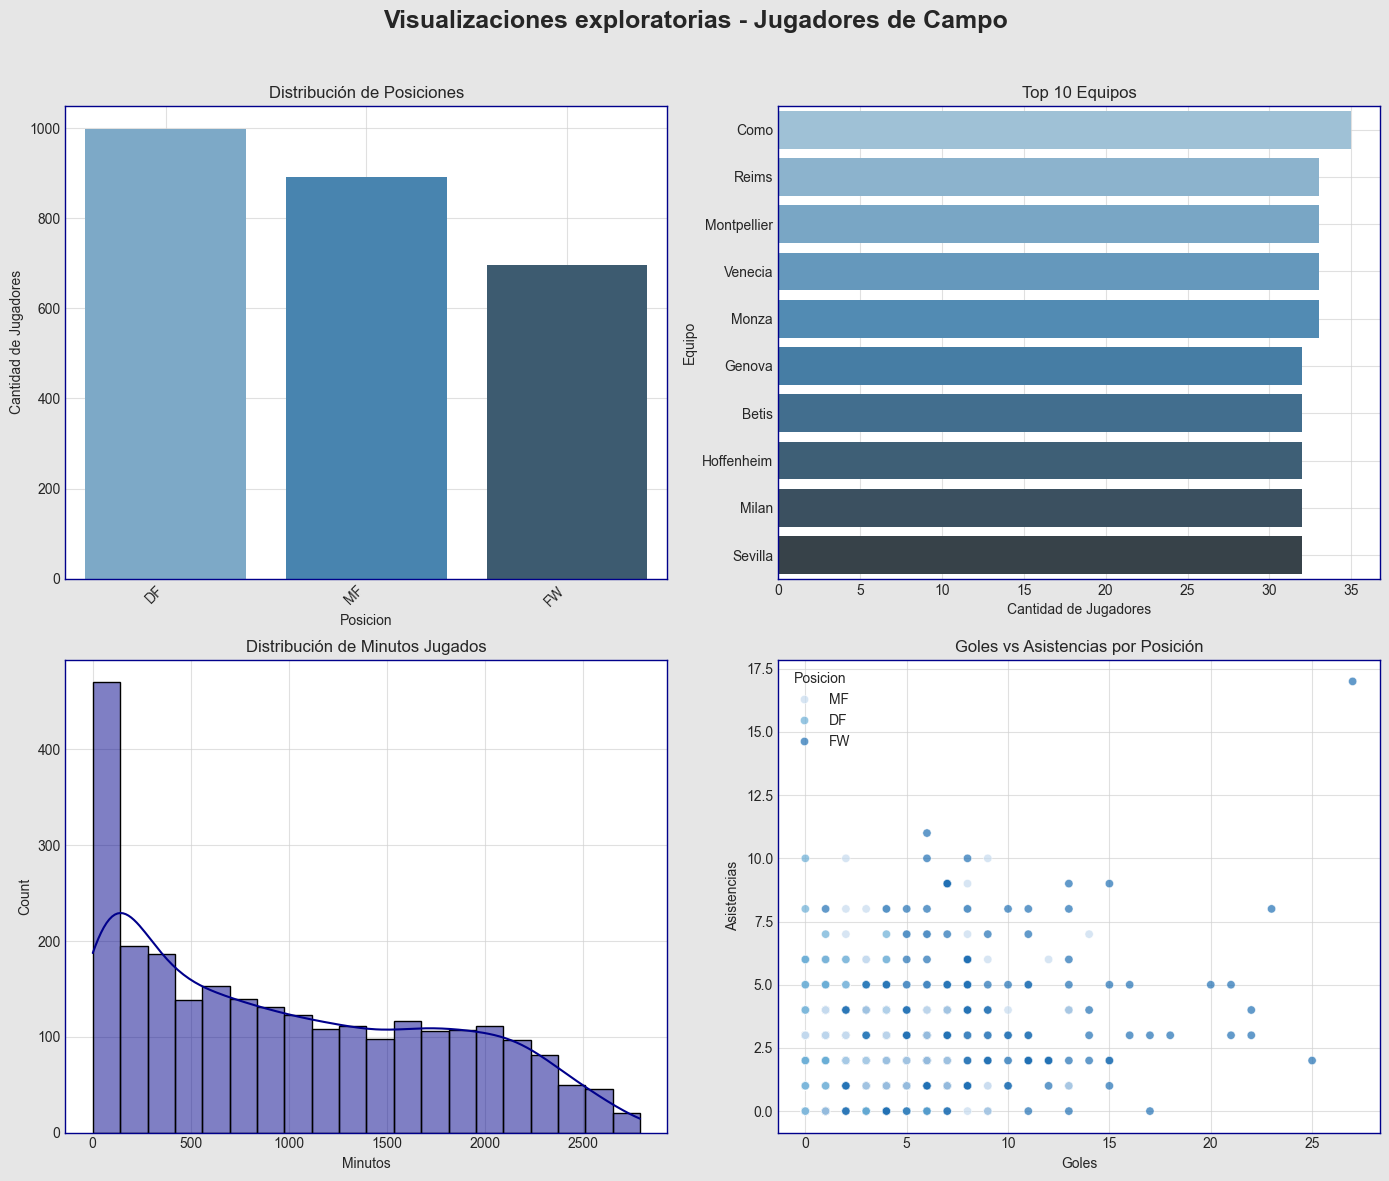

<Figure size 1200x1000 with 0 Axes>

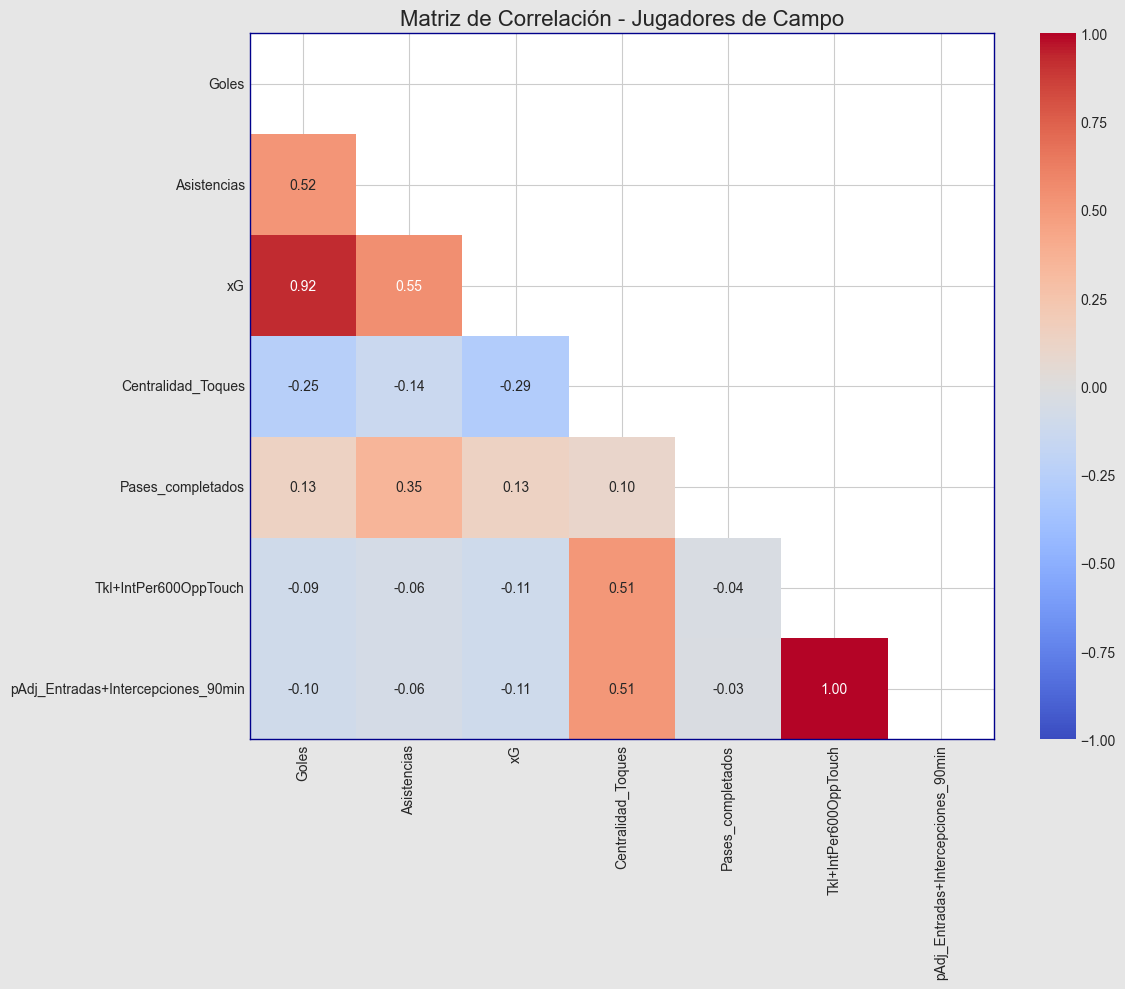

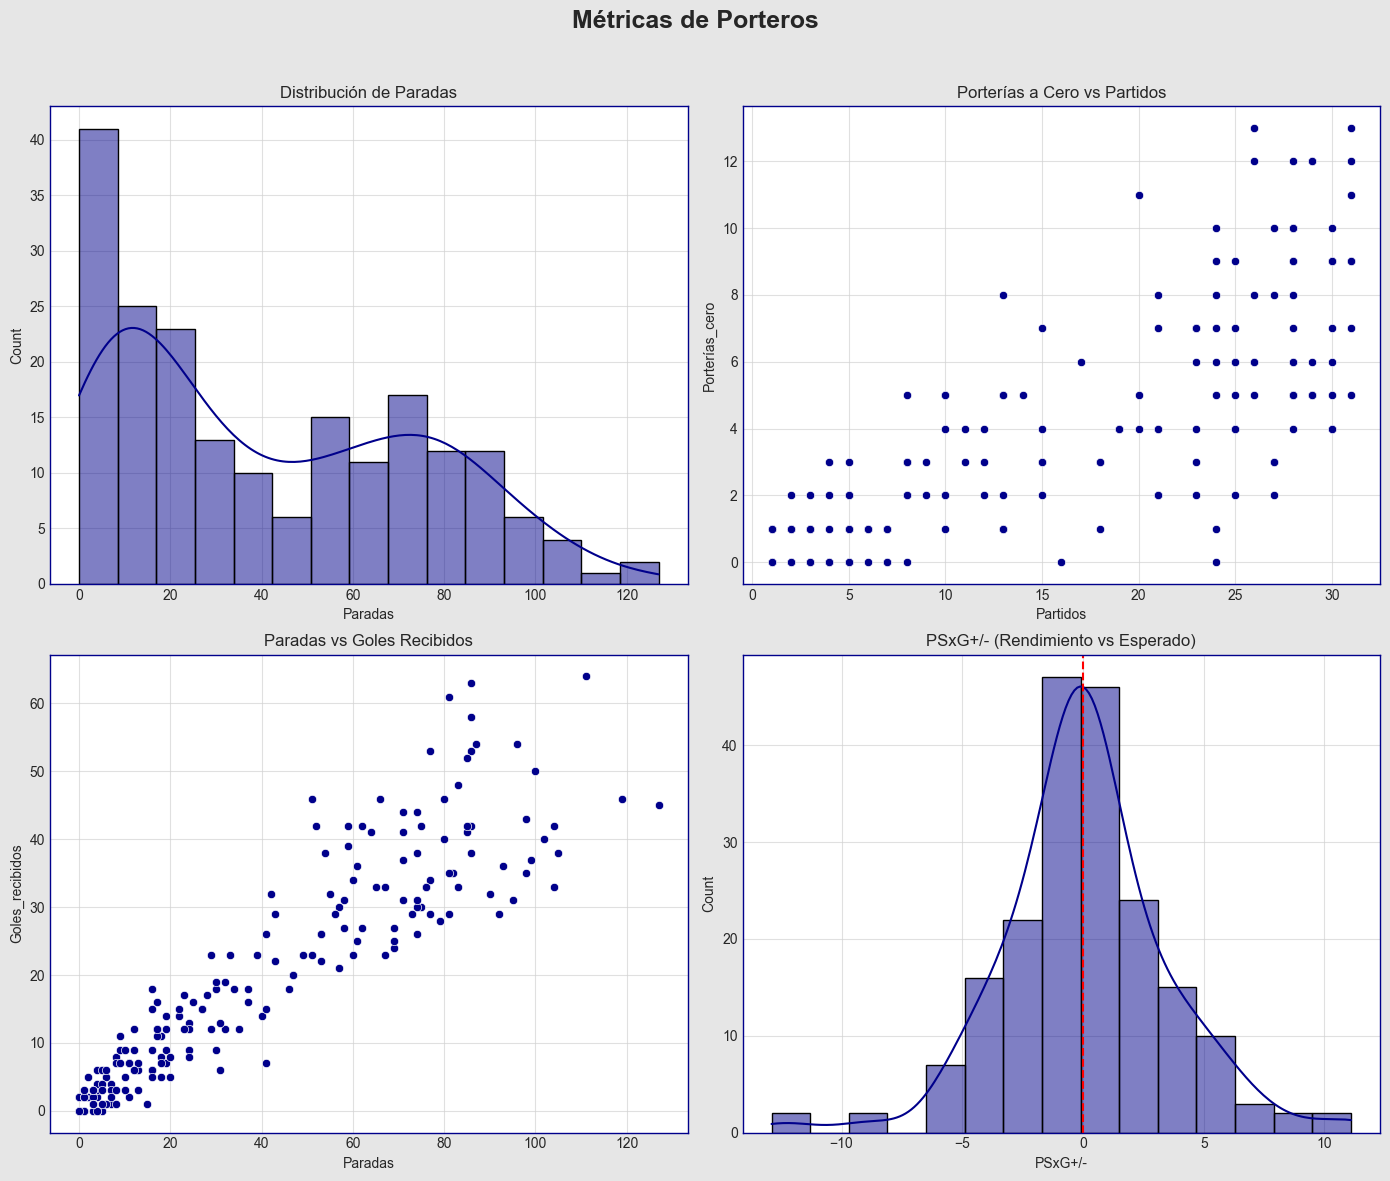

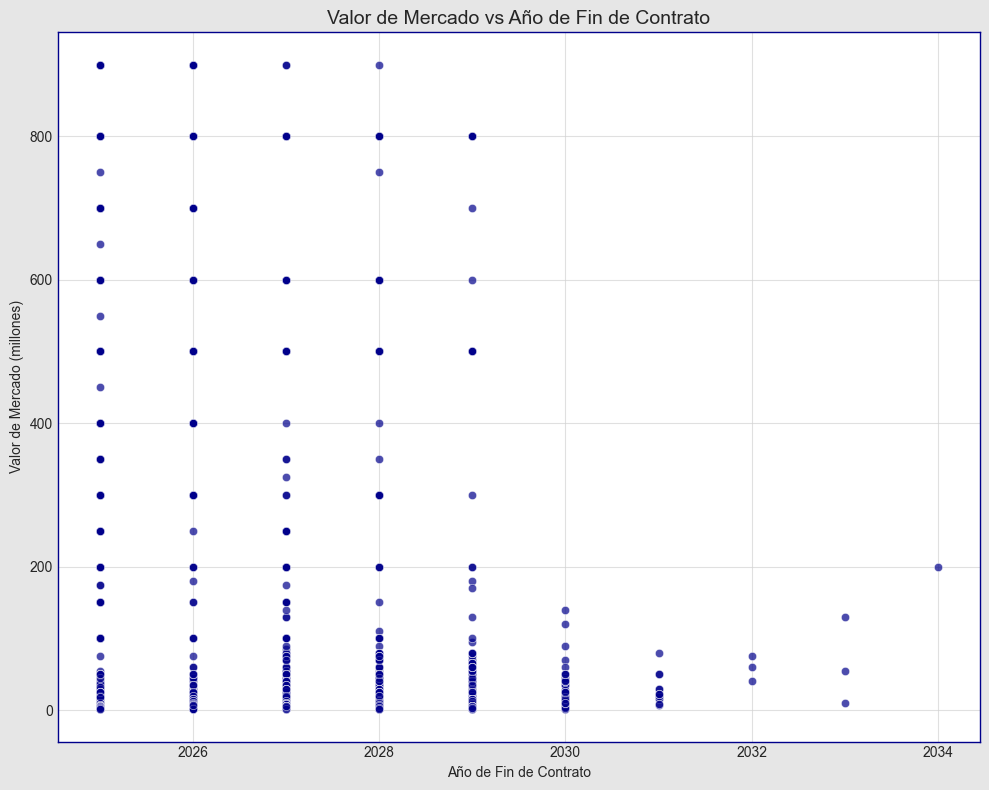

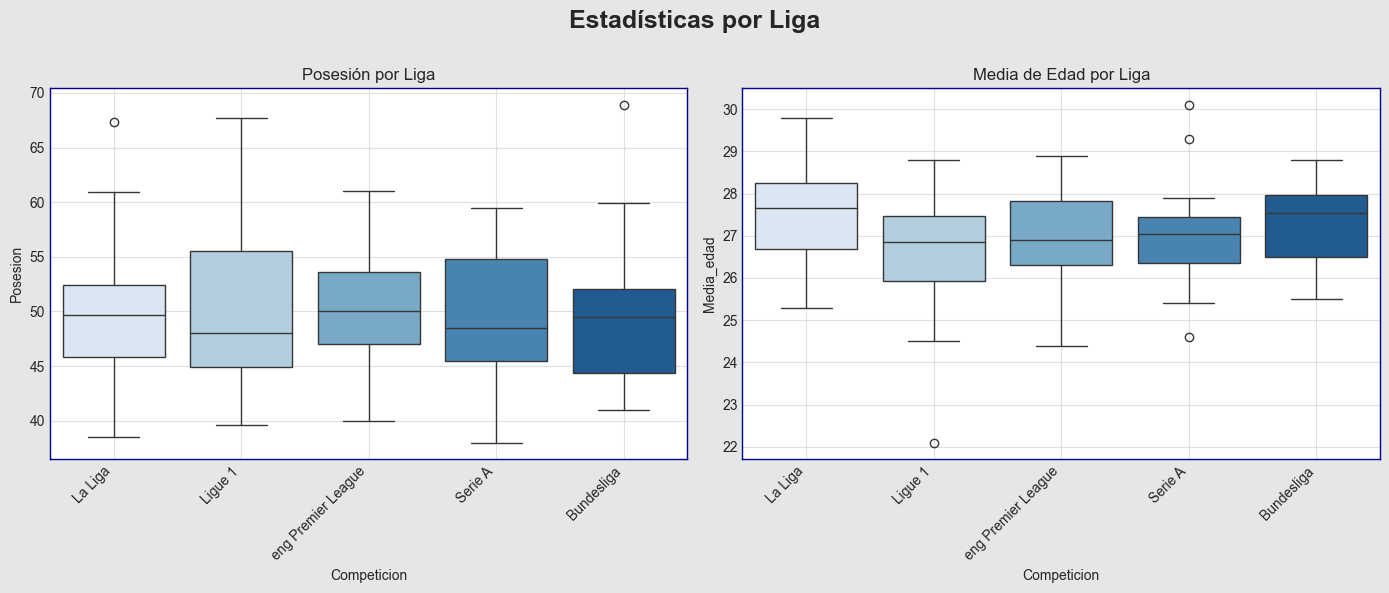

In [5]:
def visualizaciones_iniciales(df, title="Dataset"):
    """
    Crear visualizaciones exploratorias con estilo personalizado
    """
    # Configuraci√≥n de estilo
    facecolor = "#E6E6E6"
    
    # JUGADORES DE CAMPO
    if title == "Jugadores de Campo":
        fig, axes = plt.subplots(2, 2, figsize=(14, 12), facecolor=facecolor)
        fig.suptitle(f'Visualizaciones exploratorias - {title}', fontsize=18, fontweight='bold')
        
        # 1. Distribuci√≥n de posiciones
        ax1 = axes[0, 0]
        posiciones = df['Posicion'].value_counts()
        sns.barplot(x=posiciones.index, y=posiciones.values, ax=ax1, palette='Blues_d')
        ax1.set_title('Distribuci√≥n de Posiciones')
        ax1.set_ylabel('Cantidad de Jugadores')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
        
        # Aplicar estilo
        ax1.set_facecolor('white')
        for spine in ax1.spines.values():
            spine.set_color('darkblue')
            spine.set_linewidth(1)
        ax1.grid(True, color='lightgray', linestyle='-', alpha=0.7)
        
        # 2. Distribuci√≥n de equipos (Top 10)
        ax2 = axes[0, 1]
        equipos = df['Equipo'].value_counts().head(10)
        sns.barplot(x=equipos.values, y=equipos.index, ax=ax2, palette='Blues_d')
        ax2.set_title('Top 10 Equipos')
        ax2.set_xlabel('Cantidad de Jugadores')
        
        # Estilo
        ax2.set_facecolor('white')
        for spine in ax2.spines.values():
            spine.set_color('darkblue')
            spine.set_linewidth(1)
        ax2.grid(True, color='lightgray', linestyle='-', alpha=0.7)
        
        # 3. Distribuci√≥n de minutos jugados
        ax3 = axes[1, 0]
        sns.histplot(df['Minutos'], bins=20, kde=True, ax=ax3, color='darkblue')
        ax3.set_title('Distribuci√≥n de Minutos Jugados')
        ax3.set_xlabel('Minutos')
        
        # Estilo
        ax3.set_facecolor('white')
        for spine in ax3.spines.values():
            spine.set_color('darkblue')
            spine.set_linewidth(1)
        ax3.grid(True, color='lightgray', linestyle='-', alpha=0.7)
        
        # 4. Goles vs asistencias
        ax4 = axes[1, 1]
        sns.scatterplot(x='Goles', y='Asistencias', hue='Posicion', data=df, ax=ax4, alpha=0.7, palette='Blues')
        ax4.set_title('Goles vs Asistencias por Posici√≥n')
        
        # Estilo
        ax4.set_facecolor('white')
        for spine in ax4.spines.values():
            spine.set_color('darkblue')
            spine.set_linewidth(1)
        ax4.grid(True, color='lightgray', linestyle='-', alpha=0.7)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()
        
        # Matriz de correlaci√≥n para jugadores
        try:
            # Seleccionar columnas relevantes para matriz de correlaci√≥n
            corr_cols = ['Goles', 'Asistencias', 'xG', 'Centralidad_Toques', 'Pases_completados', 
                        'Tkl+IntPer600OppTouch', 'ProgCarriesPer50Touches', 'pAdj_Entradas+Intercepciones_90min']
            corr_cols = [col for col in corr_cols if col in df.columns]
            
            if len(corr_cols) > 1:
                plt.figure(figsize=(12, 10), facecolor=facecolor)
                
                # Se crea eje y figura manualmente para mayor control
                fig, ax = plt.subplots(figsize=(12, 10), facecolor=facecolor)
                
                corr = df[corr_cols].corr()
                mask = np.triu(np.ones_like(corr))
                
                # Heatmap
                sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
                        mask=mask, vmin=-1, vmax=1, ax=ax)
                
                plt.title(f'Matriz de Correlaci√≥n - {title}', fontsize=16)
                
                # Estilo despu√©s de Heatmap
                for spine in ax.spines.values():
                    spine.set_visible(True)  # Visibles los bordes
                    spine.set_color('darkblue')
                    spine.set_linewidth(1)  # Borde m√°s grueso
                
                plt.tight_layout()
                plt.show()
        except Exception as e:
            print(f"No se pudo generar la matriz de correlaci√≥n: {e}")
        
    # PORTEROS
    elif title == "Porteros":
        # Seleccionar m√©tricas relevantes para porteros
        portero_cols = ['Paradas', 'Goles_recibidos', 'Porter√≠as_cero', 'Pct_paradas', 
                        'CS%', 'PSxG+/-', 'pAdjTouchesPer90', 'Goles_recibidos_90min']
        portero_cols = [col for col in portero_cols if col in df.columns]
        
        if len(portero_cols) > 1:
            # Visualizaciones para m√©tricas de porteros
            fig, axes = plt.subplots(2, 2, figsize=(14, 12), facecolor=facecolor)
            fig.suptitle(f'M√©tricas de {title}', fontsize=18, fontweight='bold')
            
            # 1. Distribuci√≥n de paradas
            ax1 = axes[0, 0]
            if 'Paradas' in df.columns:
                sns.histplot(df['Paradas'], bins=15, kde=True, ax=ax1, color='darkblue')
                ax1.set_title('Distribuci√≥n de Paradas')
            
            # Estilo
            ax1.set_facecolor('white')
            for spine in ax1.spines.values():
                spine.set_color('darkblue')
                spine.set_linewidth(1)
            ax1.grid(True, color='lightgray', linestyle='-', alpha=0.7)
            
            # 2. Porter√≠as a cero vs partidos
            ax2 = axes[0, 1]
            if 'Porter√≠as_cero' in df.columns and 'Partidos' in df.columns:
                sns.scatterplot(x='Partidos', y='Porter√≠as_cero', data=df, ax=ax2, color='darkblue')
                ax2.set_title('Porter√≠as a Cero vs Partidos')
            
            # Estilo
            ax2.set_facecolor('white')
            for spine in ax2.spines.values():
                spine.set_color('darkblue')
                spine.set_linewidth(1)
            ax2.grid(True, color='lightgray', linestyle='-', alpha=0.7)
            
            # 3. Paradas vs goles recibidos
            ax3 = axes[1, 0]
            if 'Paradas' in df.columns and 'Goles_recibidos' in df.columns:
                sns.scatterplot(x='Paradas', y='Goles_recibidos', data=df, ax=ax3, color='darkblue')
                ax3.set_title('Paradas vs Goles Recibidos')
            
            # Estilo
            ax3.set_facecolor('white')
            for spine in ax3.spines.values():
                spine.set_color('darkblue')
                spine.set_linewidth(1)
            ax3.grid(True, color='lightgray', linestyle='-', alpha=0.7)
            
            # 4. PSxG+/- (Rendimiento vs Esperado)
            ax4 = axes[1, 1]
            if 'PSxG+/-' in df.columns:
                sns.histplot(df['PSxG+/-'], bins=15, kde=True, ax=ax4, color='darkblue')
                ax4.set_title('PSxG+/- (Rendimiento vs Esperado)')
                ax4.axvline(x=0, color='red', linestyle='--')
            
            # Estilo
            ax4.set_facecolor('white')
            for spine in ax4.spines.values():
                spine.set_color('darkblue')
                spine.set_linewidth(1)
            ax4.grid(True, color='lightgray', linestyle='-', alpha=0.7)
            
            plt.tight_layout()
            plt.subplots_adjust(top=0.9)
            plt.show()
    
    # DATOS DE MERCADO
    elif title == "Datos de Mercado":
        plt.figure(figsize=(10, 8), facecolor=facecolor)
        ax = plt.subplot()
        
        try:
            # Procesar fin de contrato - extraer solo el a√±o
            if 'fin_contrato' in df.columns:
                df['a√±o_contrato'] = df['fin_contrato'].str.extract(r'(\d{4})').astype(float)
            
            # Procesar valor de mercado - extraer solo el n√∫mero
            if 'valor_mercado' in df.columns:
                # Reemplazar comas por puntos y extraer el n√∫mero
                df['valor_num'] = df['valor_mercado'].str.replace(',', '.').str.extract(r'(\d+[\.]*\d*)').astype(float)
            
            # Crear scatter plot si tenemos ambas columnas
            if 'a√±o_contrato' in df.columns and 'valor_num' in df.columns:
                # Filtrar valores no nulos
                plot_df = df.dropna(subset=['a√±o_contrato', 'valor_num'])
                
                if not plot_df.empty:
                    sns.scatterplot(x='a√±o_contrato', y='valor_num', data=plot_df, alpha=0.7, color='darkblue')
                    plt.title('Valor de Mercado vs A√±o de Fin de Contrato', fontsize=14)
                    plt.xlabel('A√±o de Fin de Contrato')
                    plt.ylabel('Valor de Mercado (millones)')
                else:
                    plt.text(0.5, 0.5, "No hay datos v√°lidos para visualizar", 
                            ha='center', va='center', fontsize=12)
            else:
                plt.text(0.5, 0.5, "Columnas necesarias no disponibles", 
                        ha='center', va='center', fontsize=12)
        except Exception as e:
            plt.text(0.5, 0.5, f"No se pudieron procesar los datos: {str(e)}", 
                    ha='center', va='center', fontsize=12)
        
        # Estilo
        ax.set_facecolor('white')
        for spine in ax.spines.values():
            spine.set_color('darkblue')
            spine.set_linewidth(1)
        ax.grid(True, color='lightgray', linestyle='-', alpha=0.7)
        
        plt.tight_layout()
        plt.show()
    
    # ESTAD√çSTICAS DE EQUIPOS
    elif title == "Estad√≠sticas de Equipos":
        # Eliminar columnas duplicadas si existen
        # Identificamos si hay duplicados en nombres de columnas
        if len(df.columns) != len(set(df.columns)):
            # Crear un nuevo dataframe con columnas √∫nicas
            df_clean = df.loc[:, ~df.columns.duplicated()]
            print(f"Se eliminaron {len(df.columns) - len(df_clean.columns)} columnas duplicadas")
        else:
            df_clean = df
            
        # M√©tricas relevantes
        team_cols = ['Equipo', 'Competicion', 'Media_edad', 'Posesion', 'Gls']
        
        # Alternativas si no existen las columnas exactas
        if 'Media_edad' not in df_clean.columns and 'Age' in df_clean.columns:
            df_clean['Media_edad'] = df_clean['Age']
        
        if 'Gls' not in df_clean.columns and 'Goles' in df_clean.columns:
            df_clean['Gls'] = df_clean['Goles']
        
        # Filtrar solo columnas que existen
        team_cols = [col for col in team_cols if col in df_clean.columns]
        
        if len(team_cols) >= 3:  # Se necesita al menos Equipo, Competicion y una m√©trica
            # Visualizaciones para estad√≠sticas de equipos
            fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor=facecolor)
            fig.suptitle(f'Estad√≠sticas por Liga', fontsize=18, fontweight='bold')
            
            # 1. Posesi√≥n por liga
            ax1 = axes[0]
            if 'Posesion' in df_clean.columns and 'Competicion' in df_clean.columns:
                sns.boxplot(x='Competicion', y='Posesion', data=df_clean, ax=ax1, palette='Blues')
                ax1.set_title('Posesi√≥n por Liga')
                ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
            
            # Estilo
            ax1.set_facecolor('white')
            for spine in ax1.spines.values():
                spine.set_color('darkblue')
                spine.set_linewidth(1)
            ax1.grid(True, color='lightgray', linestyle='-', alpha=0.7)
            
            # 2. Media de edad por liga
            ax2 = axes[1]
            if 'Media_edad' in df_clean.columns and 'Competicion' in df_clean.columns:
                sns.boxplot(x='Competicion', y='Media_edad', data=df_clean, ax=ax2, palette='Blues')
                ax2.set_title('Media de Edad por Liga')
                ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
            
            # Estilo
            ax2.set_facecolor('white')
            for spine in ax2.spines.values():
                spine.set_color('darkblue')
                spine.set_linewidth(1)
            ax2.grid(True, color='lightgray', linestyle='-', alpha=0.7)
            
            plt.tight_layout()
            plt.subplots_adjust(top=0.85)
            plt.show()
        else:
            print(f"No hay suficientes columnas relevantes para visualizar estad√≠sticas de equipos")
            print(f"Columnas disponibles: {', '.join(df_clean.columns[:20])}...")
    
    return None

# Visualizaciones de los datasets principales
datasets_to_visualize = [
    (df_general, "Jugadores de Campo"),
    (df_porteros, "Porteros"),
    (df_mercado, "Datos de Mercado"),
    (df_equipos, "Estad√≠sticas de Equipos")
]

for df, title in datasets_to_visualize:
    if not df.empty:
        try:
            visualizaciones_iniciales(df, title)
        except Exception as e:
            print(f"Error al visualizar {title}: {e}")

### <u>An√°lisis visualizaicones</u>

1. Jugadores de Campo:
- Hay casi 1000 defensas, 900 mediocampistas y 700 delanteros en el dataset, lo que muestra una distribuci√≥n coherente con la realidad del f√∫tbol (m√°s defensas y mediocampistas que delanteros).
- La distribuci√≥n de minutos jugados tiene una clara asimetr√≠a positiva, con muchos jugadores con pocos minutos y una larga cola de jugadores con m√°s experiencia.
- El scatter plot de Goles vs Asistencias muestra una clara diferenciaci√≥n por posici√≥n, con los delanteros destacando en goles, mientras que los mediocampistas tienen mayor equilibrio entre ambas m√©tricas.
- En la matriz de correlaci√≥n, destaca la alt√≠sima correlaci√≥n entre Goles y xG (0.92), lo que sugiere que el modelo de goles esperados es muy preciso.

2. Porteros:
- La distribuci√≥n de paradas muestra dos picos (bimodal), reflejando porteros titulares (m√°s paradas) y suplentes/con menos minutos.
- Existe una correlaci√≥n positiva clara entre paradas y goles recibidos, l√≥gico, ya que m√°s minutos implican m√°s exposici√≥n a ambas situaciones.
- El PSxG+/- (rendimiento vs esperado) se distribuye normalmente alrededor de cero, lo que indica que la mayor√≠a de porteros rinden cerca de lo esperado, con algunos destacados en ambos extremos.

3. Datos de Mercado:
- Los contratos de la mayor√≠a de jugadores finalizan entre 2025-2030, con una concentraci√≥n especial en 2026 y 2028.
- Los valores de mercado m√°s altos (>400M) se concentran en jugadores con contratos hasta 2026-2028, lo que sugiere que los clubes buscan asegurar a sus estrellas con contratos de media duraci√≥n.

4. Estad√≠sticas por Liga:
- La Bundesliga tiene la menor variabilidad en posesi√≥n, mientras que Ligue 1 muestra mayor dispersi√≥n.
- La Serie A y La Liga tienen una posesi√≥n mediana similar, pero La Liga tiene casos extremos m√°s altos.
- En cuanto a la edad media, la Bundesliga tiene los equipos m√°s j√≥venes, mientras que La Liga presenta equipos con mayor experiencia.

Estas visualizaciones nos dan una excelente base para entender los perfiles de jugadores y seleccionar las caracter√≠sticas m√°s relevantes para el an√°lisis de clustering. Particularmente interesante es c√≥mo se diferencian claramente los perfiles por posici√≥n en el scatter de goles vs asistencias, anticipando que el clustering deber√≠a capturar naturalmente estos diferentes roles en el campo.

# 3. Preparaci√≥n de Datos

## 3.1 Limpieza de Datos

### <u>Proceso</u>

1. df_general: 
- Eliminar tildes y caracteres de nombres;
- Minutos no tenerlo como float;
- Cambiar nombre a correcto de columnas "Entradas_canadas" y "Bloqueos_cisparo";
- Adecuar algunos nombres para mayor conocimiento r√°pido de la m√©trica.

2. df_porteros:
- Mismo proceso que en el anterior DataFrame.

3. df_equipos:
- Elminar tildes y caracteres en nombres;
- Quitar sufijo "en" en columna de competici√≥n de los equipos de la "Premier League";
- Renombrar algunas columnas.

4. df_atletico:
- Normalizar nombres tambi√©n;
- Fecha de nacimiento se deja en Datetime, y se extrae a√±o de nacimiento.

5. df_mercado:
- Caracteres y tildes de nombres;
- Adecuar valores de altura y valor de mercado;
- Fin de contrato extraemos a√±o y los faltantes los rellenamos con el actual, 2025;
- Equipos, para cruzar, viene igual que en la columna de "Nombre_transfermarkt" del archivo master_equipos;
- Valores de mercado faltantes se rellena con la mediana de los valores;
- Y los faltantes para pie dominante, desconocido, aunque revisar√© por si hay alguno conocido.

6. df_master_equipos:
- No es necesario cambiar nada.

In [6]:
def limpiar_datos(df_general, df_porteros, df_mercado, df_atletico, df_equipos, df_master_equipos):
    """
    Realizar limpieza de datos y preparaci√≥n inicial directamente sobre los dataframes originales
    """
    # Crear copias de seguridad por si falla algo
    df_general_original = df_general.copy()
    df_porteros_original = df_porteros.copy()
    df_mercado_original = df_mercado.copy()
    df_atletico_original = df_atletico.copy()
    df_equipos_original = df_equipos.copy()
    df_master_equipos_original = df_master_equipos.copy()

    # Funci√≥n para normalizar texto (quitar acentos y caracteres especiales)
    def normalizar_texto(texto):
        if isinstance(texto, str):
            texto_normalizado = unicodedata.normalize('NFKD', texto)
            texto_sin_acentos = ''.join([c for c in texto_normalizado if not unicodedata.combining(c)])
            return texto_sin_acentos
        return texto
    
    # ---- Limpieza de df_atletico ----
    if not df_atletico.empty:

        # Duplicados
        df_atletico.drop_duplicates(subset=['nombre_completo', 'dorsal'], inplace=True)

        # Normalizar nombres
        if 'nombre_completo' in df_atletico.columns:
            df_atletico['nombre_completo'] = df_atletico['nombre_completo'].apply(normalizar_texto)
        
        if 'short_name' in df_atletico.columns:
            df_atletico['short_name'] = df_atletico['short_name'].apply(normalizar_texto)
        
        # Convertir fecha de nacimiento a datetime
        if 'fecha_nacimiento' in df_atletico.columns:
            df_atletico['fecha_nacimiento'] = pd.to_datetime(
                df_atletico['fecha_nacimiento'], 
                format='%d/%m/%Y', 
                errors='coerce'
            )

            # Extraer solo el a√±o
            df_atletico['fecha_nacimiento'] = df_atletico['fecha_nacimiento'].dt.year
        
        # Renombrar columnas con diccionario
        cambios_columnas = {
            'nombre_completo': 'Nombre',
            'short_name': 'Nombre_corto',
            'posicion': 'Posicion',
            'dorsal': 'Numero',
            'pais': 'Nacionalidad',
            'fecha_nacimiento': 'Nacimiento'
        }
        df_atletico.rename(columns=cambios_columnas, inplace=True)        
    
    # ---- Limpieza de df_mercado ----
    if not df_mercado.empty:

        # Duplicados
        df_mercado.drop_duplicates(subset=['nombre', 'dorsal', 'equipo'], inplace=True)

        # Normalizar nombres
        if 'nombre' in df_mercado.columns:
            df_mercado['nombre'] = df_mercado['nombre'].apply(normalizar_texto)
        
        # Altura
        if 'Altura' in df_mercado.columns:
            df_mercado['Altura'] = df_mercado['Altura'].str.replace('m', '', regex=False)
            df_mercado['Altura'] = df_mercado['Altura'].str.replace(',', '.', regex=False)
            df_mercado['Altura'] = df_mercado['Altura'].replace('-', np.nan)  # Reemplazar '-' por NaN
            df_mercado['Altura'] = df_mercado['Altura'].astype(float)
        
        # Fin de contrato - solo extraer a√±o
        if 'fin_contrato' in df_mercado.columns:
            df_mercado['fin_contrato'] = df_mercado['fin_contrato'].str.extract(r'(\d{4})').astype(float)
            df_mercado['fin_contrato'] = df_mercado['fin_contrato'].fillna(2025)
            # Convertir a entero para eliminar decimales
            df_mercado['fin_contrato'] = df_mercado['fin_contrato'].astype(int)

        # Valor de mercado
        if 'valor_mercado' in df_mercado.columns:
            # Funci√≥n para procesar cada valor individualmente
            def procesar_valor(valor_str):
                if pd.isna(valor_str):
                    return None
                    
                # Reemplazar coma por punto para manejar decimales
                valor_str = str(valor_str).replace(',', '.')
                
                # Extraer el n√∫mero
                match = re.search(r'(\d+(?:\.\d+)?)', valor_str)
                if not match:
                    return None
                    
                valor = float(match.group(1))
                
                # Aplicar factor seg√∫n la unidad
                if 'mill' in valor_str.lower():
                    return valor * 1000000
                elif 'mil' in valor_str.lower():
                    return valor * 1000
                else:
                    return valor
            
            # Aplicar la funci√≥n a cada valor
            df_mercado['valor_mercado'] = df_mercado['valor_mercado'].apply(procesar_valor)
            
            # Rellenar valores faltantes
            df_mercado['valor_mercado'] = df_mercado['valor_mercado'].fillna(df_mercado['valor_mercado'].median())
                    
        # Asignar pie dominante a jugadores espec√≠ficos
        if 'Pie' in df_mercado.columns:
            pie_conocidos = {
                'Juan Carlos': 'Derecho',
                'Alfon Gonzalez': 'Derecho',
                'Antonio Raillo': 'Derecho',
                'Adrian Pica': 'Izquierdo'
            }
            
            for nombre, pie in pie_conocidos.items():
                matches = df_mercado['nombre'].str.contains(nombre, case=False, na=False)
                if matches.any():
                    df_mercado.loc[matches, 'Pie'] = pie
                            
            # Valores faltantes en pie
            df_mercado['Pie'] = df_mercado['Pie'].fillna("Desconocido")
        
        # Renombrar columnas con diccionario
        cambios_columnas = {
            'dorsal': 'Numero',
            'nombre': 'Nombre',
            'fin_contrato': 'Contrato',
            'valor_mercado': 'Valor',
            'equipo': 'Equipo'
        }
        df_mercado.rename(columns=cambios_columnas, inplace=True)

        # Rellenar valores faltantes de Altura con 0
        if 'Altura' in df_mercado.columns:
            df_mercado['Altura'] = df_mercado['Altura'].fillna(0)

        # Asegurar que Contrato sea entero sin decimales
        if 'Contrato' in df_mercado.columns:
            df_mercado['Contrato'] = df_mercado['Contrato'].astype(int)

        # Eliminar columnas adicionales si existen
        if 'a√±o_contrato' in df_mercado.columns:
            df_mercado.drop('a√±o_contrato', axis=1, inplace=True)
            
        if 'valor_num' in df_mercado.columns:
            df_mercado.drop('valor_num', axis=1, inplace=True)       
    
    # ---- Limpieza de df_equipos ----
    if not df_equipos.empty:

        # Duplicados
        df_equipos.drop_duplicates(subset=['Equipo', 'Competicion'], inplace=True)

        # Normalizar nombres de equipos
        if 'Equipo' in df_equipos.columns:
            df_equipos['Equipo'] = df_equipos['Equipo'].apply(normalizar_texto)

        df_equipos['Equipo'] = df_equipos['Equipo'].str.upper()
        
        # Versi√≥n corregida para limpiar nombres de competiciones
        if 'Competicion' in df_equipos.columns:            
            
            # Usar un patr√≥n m√°s espec√≠fico para detectar los prefijos
            df_equipos['Competicion'] = df_equipos['Competicion'].str.replace(r'^(eng|es|it|de|fr) ', '', regex=True)
            
        # Renombrar columnas con diccionario
        cambios_columnas = {
            'Jugadores': 'Num_jugadores',
            'PK': 'Penaltis',
            'PKatt': 'Penaltis_lanzados',
            'GA': 'Goles_en_contra',
            'GA90': 'Goles_en_contra_por_90',
            'SoTA': 'Tiros_recibidos',
            'Saves': 'Paradas',
            'Save%': 'Pocentaje_paradas',
            'CS': 'Porterias_a_cero',
            'CS%': 'Porcentaje_porterias.a_cero',
            'Cmp': 'Pases',
            'Att': 'Pases_int',
            'Cmp%': 'Porcentaje_pases',
            'TotDist': 'Dist_pases',
            'PrgDist': 'Dist_progr_pases',
            'KP': 'Pases_clave',
            'PPA': 'Pases_area_penal',
            'CrsPA': 'Centros_area',
            'Def 3rd': 'Acc_def_primer_tercio',
            'Mid 3rd': 'Acc_def_segun_tercio',
            'Att 3rd': 'Acc_def_ult_tercio',
            'Lost': 'Perdidas',
            'Att Pen': 'Conducc_hasta_area',
            'Succ': 'Regates_exit',
            'Succ%': 'Porcentaje_regates',
            'CPA': 'Conducciones_hasta_area',
            'Won': 'Duelos_ganados',
            'Won%': 'Porcentaje_duelos_ganados'
        }
        df_equipos.rename(columns=cambios_columnas, inplace=True)        
    
    # ---- Limpieza de df_master_equipos ----
    if not df_master_equipos.empty:
        # Duplicados
        df_master_equipos.drop_duplicates(inplace=True)

        # Renombrar columnas con diccionario
        cambios_columnas = {
            'short_name': 'Nombre_corto',
            'team_name': 'Nombre',
            'nombre_oficial': 'Nombre_oficial',
            'competicion': 'Competicion'
        }
        df_master_equipos.rename(columns=cambios_columnas, inplace=True)

    # ---- Limpieza de df_general ----
    if not df_general.empty:

        # Eliminar duplicados
        df_general.drop_duplicates(subset=['Jugador', 'Equipo'], inplace=True)

        # Normalizar nombres de jugadores
        if 'Jugador' in df_general.columns:
            df_general['Jugador'] = df_general['Jugador'].apply(normalizar_texto)

        # Renombrar columnas con diccionario
        cambios_columnas = {
            'Jugador': 'Nombre',
            'Entradas_canadas': 'Entradas_ganadas',
            'Bloqueos_cisparo': 'Bloqueos_disparos',
            'pAdj_Entradas+Intercepciones_90min': 'Acc_defensivas_por90_ajus_posesion',
            'pAdjClrPer90': 'Despejes_por90_ajus_posesion'
        }
        df_general.rename(columns=cambios_columnas, inplace=True)
        
        # Convertir Minutos a int
        if 'Minutos' in df_general.columns:
            df_general['Minutos'] = df_general['Minutos'].astype(int)
        
        # Manejo de valores faltantes para datos num√©ricos
        numeric_cols = df_general.select_dtypes(include=['float64', 'int64']).columns
        df_general[numeric_cols] = df_general.groupby('Posicion')[numeric_cols].transform(
            lambda x: x.fillna(x.median())
        )   

        # Eliminar columna de Posicion Principal porque m√°s adelante me dar√° muchos problemas
        if 'Posicion_princ' in df_general.columns:
            df_general.drop('Posicion_princ', axis=1, inplace=True)    
    
    # ---- Limpieza de df_porteros ----
    if not df_porteros.empty:

        # Eliminar duplicados
        df_porteros.drop_duplicates(subset=['Jugador', 'Equipo'], inplace=True)

        # Normalizar nombres de porteros
        if 'Jugador' in df_porteros.columns:
            df_porteros['Jugador'] = df_porteros['Jugador'].apply(normalizar_texto)
        
        # Convertir Minutos a int
        if 'Minutos' in df_porteros.columns:
            df_porteros['Minutos'] = df_porteros['Minutos'].astype(int)
        
        # Manejo de valores faltantes para datos num√©ricos
        numeric_cols = df_porteros.select_dtypes(include=['float64', 'int64']).columns
        df_porteros[numeric_cols] = df_porteros[numeric_cols].fillna(df_porteros[numeric_cols].median())
        
        # Renombrar columnas con diccionario
        cambios_columnas = {
            'Jugador': 'Nombre',
            'CS%': 'Porcentajes_porterias_a_cero',
            'PKsFaced': 'Penaltis_recibidos',
            'PKsv': 'Penaltis_parados',
            'PKA':  'Penaltis_encajados',
            'PKm': 'Penaltis_errados_por_rival',
            'PSxG': 'xG_tras_tiro',
            'PSxG/SoT': 'PSxG_por_disparos_a_puerta', # Valor alto, mejor cualidad
            'PSxG+/-': 'Dif_PSxG_goles_encajados', # Valor alto, mejor cualidad
            'PSxG+/- /90': 'Diferencial_por_90', # Valor alto, mejor cualidad
            'LaunchCmp': 'Pases_largos_cmpl',
            'LaunchAtt': 'Pases_largos_int',
            'LaunchPassCmp%': 'Porcentaje_pases_largos',
            'GoalKicksAtt': 'Saques_de_puerta',
            'GoalKicksLaunch%': 'Saques_de_puerta_lanzados_largos',
            'AvgLen': 'Long_media_desplaz_largos',
            'CrsStp%': '%Centros_atajados',
            '#OPA/90': 'Acc_fuera_area_por_90',
            'AvgDistOPA': 'Distancia_media_porteria',
            'pAdjAerialWinsPer90': 'Duelos_aereos_ganados_por_90',
            'pAdjTouchesPer90': 'Toques_por_90_ajust_posesion'
        }
        df_porteros.rename(columns=cambios_columnas, inplace=True)
    
    print("Limpieza de datos completada")

# Aplicar limpieza directamente sobre los dataframes originales
limpiar_datos(df_general, df_porteros, df_mercado, df_atletico, df_equipos, df_master_equipos)

Limpieza de datos completada


## 3.2 Feature Engineering

In [7]:
def crear_features(df_general, df_porteros, df_equipos=None, df_mercado=None):
    """
    Crear caracter√≠sticas espec√≠ficas por posici√≥n para an√°lisis de similitud de jugadores.
    
    Args:
        df_general: DataFrame con estad√≠sticas de jugadores de campo
        df_porteros: DataFrame con estad√≠sticas de porteros
        df_equipos: DataFrame opcional con informaci√≥n de equipos
        df_mercado: DataFrame opcional con datos de mercado
        
    Returns:
        dict: Diccionario con DataFrames por posici√≥n (GK, DF, MF, FW)
    """    
    
    # Inicializar diccionario para almacenar DFs por posici√≥n
    dfs_posicion = {
        'GK': pd.DataFrame(),
        'DF': pd.DataFrame(),
        'MF': pd.DataFrame(),
        'FW': pd.DataFrame()
    }
    
    # Si quieres mantener los mismos nombres
    df_general = df_general.copy() if not df_general.empty else pd.DataFrame()
    df_porteros = df_porteros.copy() if not df_porteros.empty else pd.DataFrame()
    
    # Preparar caracter√≠sticas comunes para jugadores de campo
    if not df_general.empty:
        # 1. Efectividad en ataque (goles + asistencias por 90 minutos)
        if all(col in df_general.columns for col in ['Goles', 'Asistencias', 'Minutos']):
            df_general['Efectividad_Ataque'] = (df_general['Goles'] + df_general['Asistencias']) / (df_general['Minutos'] / 90)
            df_general['Efectividad_Ataque'] = df_general['Efectividad_Ataque'].fillna(0)
        
        # 2. Eficiencia de pases
        if all(col in df_general.columns for col in ['Pases_completados', 'Pases_intentados']):
            df_general['Eficiencia_Pases'] = df_general['Pases_completados'] / df_general['Pases_intentados']
            df_general['Eficiencia_Pases'] = df_general['Eficiencia_Pases'].fillna(0)
        
        # 3. Contribuci√≥n defensiva (entradas + intercepciones por 90 minutos)
        if all(col in df_general.columns for col in ['Entradas', 'Intercepciones', 'Minutos']):
            df_general['Contribucion_Defensiva'] = (df_general['Entradas'] + df_general['Intercepciones']) / (df_general['Minutos'] / 90)
            df_general['Contribucion_Defensiva'] = df_general['Contribucion_Defensiva'].fillna(0)
        
        # 4. Creaci√≥n de ocasiones por 90 minutos
        if all(col in df_general.columns for col in ['Pases_clave', 'Minutos']):
            df_general['Creacion_Ocasiones'] = df_general['Pases_clave'] / (df_general['Minutos'] / 90)
            df_general['Creacion_Ocasiones'] = df_general['Creacion_Ocasiones'].fillna(0)
            
        # 5. Precisi√≥n de disparo
        if all(col in df_general.columns for col in ['Disparos_porteria', 'Disparos']):
            df_general['Precision_Disparo'] = df_general['Disparos_porteria'] / df_general['Disparos']
            df_general['Precision_Disparo'] = df_general['Precision_Disparo'].fillna(0)
        
        # 6. Eficiencia ofensiva (goles / xG)
        if all(col in df_general.columns for col in ['Goles', 'xG']):
            df_general['Eficiencia_Ofensiva'] = df_general['Goles'] / df_general['xG']
            df_general['Eficiencia_Ofensiva'] = df_general['Eficiencia_Ofensiva'].fillna(1)
        
        # 7. Progresi√≥n de juego
        if all(col in df_general.columns for col in ['Pases_progresivos', 'Conducciones_progresivas', 'Minutos']):
            df_general['Indice_Progresion'] = (df_general['Pases_progresivos'] + df_general['Conducciones_progresivas']) / (df_general['Minutos'] / 90)
            df_general['Indice_Progresion'] = df_general['Indice_Progresion'].fillna(0)
        
        # 8. Eficiencia en duelos
        if all(col in df_general.columns for col in ['Duelos_aereos_ganados', 'Duelos_aereos_perdidos', 'Regates_exitosos', 'Regates_intentados']):
            df_general['Eficiencia_Duelos_Aereos'] = df_general['Duelos_aereos_ganados'] / (df_general['Duelos_aereos_ganados'] + df_general['Duelos_aereos_perdidos'])
            df_general['Eficiencia_Duelos_Aereos'] = df_general['Eficiencia_Duelos_Aereos'].fillna(0)
            
            df_general['Eficiencia_Regates'] = df_general['Regates_exitosos'] / df_general['Regates_intentados']
            df_general['Eficiencia_Regates'] = df_general['Eficiencia_Regates'].fillna(0)
        
        # 9. Influencia en el juego
        if all(col in df_general.columns for col in ['Centralidad_Toques', 'Minutos']):
            df_general['Influencia_Juego'] = df_general['Centralidad_Toques'] * (df_general['Minutos'] / 90)
            df_general['Influencia_Juego'] = df_general['Influencia_Juego'].fillna(0)
    
    # Preparar caracter√≠sticas para porteros
    if not df_porteros.empty:
        # 1. Eficiencia de paradas
        if all(col in df_porteros.columns for col in ['Paradas', 'Disparos_recibidos_porteria']):
            df_porteros['Eficiencia_Paradas'] = df_porteros['Paradas'] / df_porteros['Disparos_recibidos_porteria']
            df_porteros['Eficiencia_Paradas'] = df_porteros['Eficiencia_Paradas'].fillna(0)
        
        # 2. Porter√≠as a cero por partido
        if all(col in df_porteros.columns for col in ['Porter√≠as_cero', 'Partidos']):
            df_porteros['Porcentaje_Porterias_Cero'] = df_porteros['Porter√≠as_cero'] / df_porteros['Partidos']
            df_porteros['Porcentaje_Porterias_Cero'] = df_porteros['Porcentaje_Porterias_Cero'].fillna(0)
        
        # 3. Eficiencia de pases para porteros
        if all(col in df_porteros.columns for col in ['Pases_largos_cmpl', 'Pases_largos_int']):
            df_porteros['Eficiencia_Pases_Largos'] = df_porteros['Pases_largos_cmpl'] / df_porteros['Pases_largos_int']
            df_porteros['Eficiencia_Pases_Largos'] = df_porteros['Eficiencia_Pases_Largos'].fillna(0)
        
        # 4. Rendimiento vs esperado (PSxG+/-)
        if 'Dif_PSxG_goles_encajados' in df_porteros.columns:
            df_porteros['Rendimiento_vs_Esperado'] = df_porteros['Dif_PSxG_goles_encajados']
            df_porteros['Rendimiento_vs_Esperado'] = df_porteros['Rendimiento_vs_Esperado'].fillna(0)
        
        # 5. Actividad fuera del √°rea
        if all(col in df_porteros.columns for col in ['Acciones_fuera_area', 'Minutos']):
            df_porteros['Actividad_Fuera_Area'] = df_porteros['Acciones_fuera_area'] / (df_porteros['Minutos'] / 90)
            df_porteros['Actividad_Fuera_Area'] = df_porteros['Actividad_Fuera_Area'].fillna(0)
            
        # 6. Eficiencia contra penaltis
        if all(col in df_porteros.columns for col in ['Penaltis_parados', 'Penaltis_recibidos']):
            df_porteros['Eficiencia_Penaltis'] = df_porteros['Penaltis_parados'] / df_porteros['Penaltis_recibidos']
            df_porteros['Eficiencia_Penaltis'] = df_porteros['Eficiencia_Penaltis'].fillna(0)
        
        # 7. √çndice de sweeper keeper
        if all(col in df_porteros.columns for col in ['Acciones_fuera_area', 'Distancia_media_porteria']):
            df_porteros['Indice_Sweeper'] = df_porteros['Acciones_fuera_area'] * df_porteros['Distancia_media_porteria'] / 100
            df_porteros['Indice_Sweeper'] = df_porteros['Indice_Sweeper'].fillna(0)
    
    # PORTEROS (GK)
    if not df_porteros.empty:
        # Seleccionar jugadores GK
        gk_df = df_porteros.copy()
        
        # Seleccionar caracter√≠sticas relevantes para porteros
        gk_features = [
            'Nombre', 'Equipo', 'Edad', 'Minutos',
            'Eficiencia_Paradas', 'Porcentaje_Porterias_Cero', 
            'Eficiencia_Pases_Largos', 'Rendimiento_vs_Esperado',
            'Actividad_Fuera_Area', 'Eficiencia_Penaltis', 'Indice_Sweeper'
        ]
        
        # Filtrar columnas disponibles
        gk_features = [col for col in gk_features if col in gk_df.columns]
        
        # Asignar al diccionario
        if len(gk_features) > 3:  # Al menos necesitamos nombre, equipo y algunas m√©tricas
            dfs_posicion['GK'] = gk_df[gk_features]
    
    # JUGADORES DE CAMPO (DF, MF, FW)
    if not df_general.empty:
    # DEFENSAS (DF)
        df_df = df_general[df_general['Posicion'] == 'DF'].copy()
        if not df_df.empty:
            # Caracter√≠sticas espec√≠ficas para defensas
            if all(col in df_df.columns for col in ['Entradas', 'Entradas_ganadas']):
                df_df['Eficiencia_Entradas'] = df_df['Entradas_ganadas'] / df_df['Entradas']
                df_df['Eficiencia_Entradas'] = df_df['Eficiencia_Entradas'].fillna(0)
            
            if all(col in df_df.columns for col in ['Bloqueos_disparos', 'Despejes', 'Minutos']):
                df_df['Acciones_Defensivas_90'] = (df_df['Bloqueos_disparos'] + df_df['Despejes']) / (df_df['Minutos'] / 90)
                df_df['Acciones_Defensivas_90'] = df_df['Acciones_Defensivas_90'].fillna(0)
            
            # Seleccionar caracter√≠sticas para defensas
            df_features = [
                'Nombre', 'Equipo', 'Edad', 'Minutos', 'Posicion',
                'Contribucion_Defensiva', 'Eficiencia_Pases', 'Eficiencia_Duelos_Aereos',
                'Eficiencia_Entradas', 'Acciones_Defensivas_90', 
                'Indice_Progresion', 'Influencia_Juego'
            ]
            
            # Filtrar columnas disponibles
            df_features = [col for col in df_features if col in df_df.columns]
            
            # Asignar al diccionario
            if len(df_features) > 3:
                dfs_posicion['DF'] = df_df[df_features]
        
        # CENTROCAMPISTAS (MF)
        df_mf = df_general[df_general['Posicion'] == 'MF'].copy()
        if not df_mf.empty:
            # Caracter√≠sticas espec√≠ficas para centrocampistas
            if all(col in df_mf.columns for col in ['Pases_clave', 'Pases_progresivos', 'Minutos']):
                df_mf['Creacion_Juego_90'] = (df_mf['Pases_clave'] + df_mf['Pases_progresivos']) / (df_mf['Minutos'] / 90)
                df_mf['Creacion_Juego_90'] = df_mf['Creacion_Juego_90'].fillna(0)
            
            if all(col in df_mf.columns for col in ['Pases_filtrados', 'Minutos']):
                df_mf['Pases_Filtrados_90'] = df_mf['Pases_filtrados'] / (df_mf['Minutos'] / 90)
                df_mf['Pases_Filtrados_90'] = df_mf['Pases_Filtrados_90'].fillna(0)
            
            # Seleccionar caracter√≠sticas para centrocampistas
            mf_features = [
                'Nombre', 'Equipo', 'Edad', 'Minutos', 'Posicion',
                'Eficiencia_Pases', 'Contribucion_Defensiva', 'Creacion_Ocasiones',
                'Creacion_Juego_90', 'Pases_Filtrados_90', 'Indice_Progresion',
                'Eficiencia_Regates', 'Influencia_Juego', 'Efectividad_Ataque'
            ]
            
            # Filtrar columnas disponibles
            mf_features = [col for col in mf_features if col in df_mf.columns]
            
            # Asignar al diccionario
            if len(mf_features) > 3:
                dfs_posicion['MF'] = df_mf[mf_features]
        
        # DELANTEROS (FW)
        df_fw = df_general[df_general['Posicion'] == 'FW'].copy()
        if not df_fw.empty:
            # Caracter√≠sticas espec√≠ficas para delanteros
            if all(col in df_fw.columns for col in ['Goles', 'xG', 'Minutos']):
                df_fw['Goles_Sobre_xG'] = df_fw['Goles'] - df_fw['xG']
                df_fw['Goles_Por_90'] = df_fw['Goles'] / (df_fw['Minutos'] / 90)
            
            if all(col in df_fw.columns for col in ['Disparos', 'Minutos']):
                df_fw['Disparos_Por_90'] = df_fw['Disparos'] / (df_fw['Minutos'] / 90)
            
            # Seleccionar caracter√≠sticas para delanteros
            fw_features = [
                'Nombre', 'Equipo', 'Edad', 'Minutos', 'Posicion',
                'Efectividad_Ataque', 'Precision_Disparo', 'Eficiencia_Ofensiva',
                'Goles_Sobre_xG', 'Goles_Por_90', 'Disparos_Por_90',
                'Eficiencia_Regates', 'Creacion_Ocasiones', 'Eficiencia_Duelos_Aereos'
            ]
            
            # Filtrar columnas disponibles
            fw_features = [col for col in fw_features if col in df_fw.columns]
            
            # Asignar al diccionario
            if len(fw_features) > 3:
                dfs_posicion['FW'] = df_fw[fw_features]
    
    # Normalizar caracter√≠sticas num√©ricas para cada posici√≥n
    for pos in dfs_posicion:
        if not dfs_posicion[pos].empty:
            # Identificar columnas num√©ricas exceptuando identificadores
            non_numeric_cols = ['Nombre', 'Equipo', 'Posicion', 'Posicion_2', 'Nacionalidad']
            numeric_cols = [col for col in dfs_posicion[pos].columns 
                           if col not in non_numeric_cols]
            
            # Crear copia de columnas originales si se necesita para referencia
            for col in numeric_cols:
                dfs_posicion[pos][f'{col}_original'] = dfs_posicion[pos][col]
            
            # Aplicar normalizaci√≥n
            if len(numeric_cols) > 0:
                scaler = StandardScaler()
                dfs_posicion[pos][numeric_cols] = scaler.fit_transform(dfs_posicion[pos][numeric_cols])
    
    return dfs_posicion

In [8]:
## Prueba feature enginering
df_por_posicion = crear_features(df_general, df_porteros)
for pos, df in df_por_posicion.items():
    print(f"Posici√≥n {pos}: {len(df)} jugadores, {len(df.columns)} caracter√≠sticas")
    print(df.columns.tolist())
    print(df.head(2))
    print("-" * 50)

Posici√≥n GK: 198 jugadores, 20 caracter√≠sticas
['Nombre', 'Equipo', 'Edad', 'Minutos', 'Eficiencia_Paradas', 'Porcentaje_Porterias_Cero', 'Eficiencia_Pases_Largos', 'Rendimiento_vs_Esperado', 'Actividad_Fuera_Area', 'Eficiencia_Penaltis', 'Indice_Sweeper', 'Edad_original', 'Minutos_original', 'Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original', 'Eficiencia_Pases_Largos_original', 'Rendimiento_vs_Esperado_original', 'Actividad_Fuera_Area_original', 'Eficiencia_Penaltis_original', 'Indice_Sweeper_original']
             Nombre       Equipo      Edad   Minutos  Eficiencia_Paradas  \
0    Aaron Ramsdale  Southampton -0.609041  0.806794           -0.070451   
1  Adrian Rodriguez       Alaves -1.041264 -1.212515            0.100281   

   Porcentaje_Porterias_Cero  Eficiencia_Pases_Largos  \
0                  -0.703798                -0.268626   
1                   1.135880                 0.254498   

   Rendimiento_vs_Esperado  Actividad_Fuera_Area  Eficiencia_Penaltis 

### <u>Resumen creaci√≥n de Features</u>

Lo que he hecho en esta fase ha sido crear una funci√≥n de feature engineering que:
- Genera caracter√≠sticas avanzadas para jugadores de campo (efectividad de ataque, eficiencia de pases, contribuci√≥n defensiva, etc.);
- Crea m√©tricas espec√≠ficas para porteros (eficiencia de paradas, porter√≠as a cero, rendimiento vs. esperado);
- A√±ade √≠ndices de rendimiento espec√≠ficos seg√∫n la posici√≥n;
- Maneja valores nulos de forma adecuada para evitar errores en c√°lculos;
- Prepara los datos para el an√°lisis posterior, organiz√°ndolos por posici√≥n.

Estas nuevas caracter√≠sticas nos permitir√°n:
- Comparar jugadores dentro de su posici√≥n de forma m√°s precisa;
- Capturar aspectos del rendimiento que no son evidentes en las estad√≠sticas crudas;
- Tener un conjunto de datos enriquecido listo para la fase de modelado.

## 3.3 Preparaci√≥n para Modelado

In [9]:
def preparar_datos_modelado(dfs_posicion, n_clusters=None):
    """
    Aplica algoritmo K-means a cada conjunto de datos por posici√≥n.
    
    Args:
        dfs_posicion: Diccionario con DataFrames por posici√≥n
        n_clusters: N√∫mero de clusters por posici√≥n (dict o None para autom√°tico)
        
    Returns:
        dict: Diccionario con DataFrames que incluyen etiquetas de cluster
    """
    
    resultado_clusters = {}
    
    # Determinar n√∫mero de clusters autom√°ticamente
    if n_clusters is None:
        n_clusters = {
            'GK': 5,
            'DF': 6,
            'MF': 7,
            'FW': 6
        }
    
    # Para cada posici√≥n
    for pos, df in dfs_posicion.items():
        if df.empty:
            resultado_clusters[pos] = df
            continue
        
        # Guardar columnas no num√©ricas para despu√©s
        non_numeric_cols = ['Nombre', 'Equipo', 'Posicion', 'Posicion_2', 'Nacionalidad']
        id_cols = [col for col in non_numeric_cols if col in df.columns]

        # Obtener columnas para clustering (num√©ricas que no sean "_original")
        feature_cols = [col for col in df.columns 
                    if col not in id_cols 
                    and not col.endswith('_original')
                    and pd.api.types.is_numeric_dtype(df[col])]  # Esta l√≠nea es crucial
        
        if len(feature_cols) < 2:  # Necesitamos al menos 2 caracter√≠sticas
            resultado_clusters[pos] = df
            continue
        
        # Determinar el n√∫mero √≥ptimo de clusters si no se ha especificado
        k = n_clusters[pos]
        if isinstance(n_clusters, dict) and pos in n_clusters:
            k = n_clusters[pos]
        
        # Aplicar K-means
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        df_copy = df.copy()
        
        # A√±adir cluster al DataFrame
        df_copy['cluster'] = kmeans.fit_predict(df[feature_cols])
        
        # Calcular PCA para visualizaci√≥n
        if len(feature_cols) >= 2:
            pca = PCA(n_components=2)
            pca_result = pca.fit_transform(df[feature_cols])
            df_copy['pca_x'] = pca_result[:, 0]
            df_copy['pca_y'] = pca_result[:, 1]
        
        # Guardar resultado
        resultado_clusters[pos] = df_copy
    
    return resultado_clusters

In [10]:
# 3.3 - Preparaci√≥n del modelado (KMeans por posici√≥n)
resultado_clusters = preparar_datos_modelado(df_por_posicion)
print("‚úÖ Clustering por posici√≥n completado (resultado_clusters listo)")

‚úÖ Clustering por posici√≥n completado (resultado_clusters listo)


### <u>Preparaci√≥n de modelado</u>

- Tomamos como entrada los dataframes por posici√≥n que generamos con la funci√≥n crear_features;
- Se configura el algoritmo K-means para cada posici√≥n (GK, DF, MF, FW);
- Definimos el n√∫mero de clusters por cada posici√≥n (por defecto 5, 6, 7 y 6 respectivamente);
- Se preparan las caracter√≠sticas num√©ricas para el clustering;
- Aplicamos PCA para reducir dimensionalidad y facilitar visualizaci√≥n;
- Devuelve los dataframes con las etiquetas de cluster asignadas.

# 4. Modelado

## 4.1 Primer Modelo (Clustering con K-Means, continuaci√≥n)

    Importante, Riquelme y Llorente vienen con posiciones distintas en los dos CSV, por lo que es recomendable cambiar el de stats, ya que el master de la plantilla es m√°s fiable para el Cluster.

In [11]:
# Funci√≥n para la prueba de K-Means
def entrenar_modelo(jugador_atleti, resultado_clusters, df_atletico, top_n=10, graficar=True):
    """
    Flujo completo:
    - Aplica alias
    - Obtiene posici√≥n y mapea a GK/DF/MF/FW
    - Localiza cluster
    - Calcula similitud
    - Muestra tabla y (opcionalmente) gr√°fica del cluster
    """
    
    # Alias de nombres para solventar inconsistencias
    alias_mapping = {
        "Musso": "Juan Musso", "Gimenez": "Jose Maria Gimenez", "Azpilicueta": "Cesar Azpilicueta",
        "Koke": "Jorge Resurreccion", "Gallagher": "Conor Gallagher", "De Paul": "Rodrigo De Paul",
        "Griezmann": "Antoine Griezmann", "Barrios": "Pablo Barrios", "Sorloth": "Alexander Sorloth",
        "Aleksander Sorloth": "Alexander Sorloth", "Sorloth": "Alexander S√∏rloth", "Alexander Sorloth": "Alexander S√∏rloth",
        "Correa": "Angel Correa", "Lemar": "Thomas Lemar", "Samu Lino": "Samuel Lino", "Lino": "Samu Lino",
        "Oblak": "Jan Oblak", "Llorente": "Marcos Llorente", "Lenglet": "Clement Lenglet",
        "Molina": "Nahuel Molina", "Riquelme": "Rodrigo Riquelme", "J. Alvarez": "Julian Alvarez", "Julian": "Julian Alvarez",
        "Witsel": "Axel Witsel", "J. Galan": "Javi Galan", "Galan": "Javi Galan", "Giuliano": "Giuliano Simeone",
        "Reinildo": "Reinildo Mandava", "Le Normand": "Robin Le Normand",
    }
    
    jugador_real = alias_mapping.get(jugador_atleti, jugador_atleti)
    
    # Aplicar alias en df_atletico
    df_atletico['Nombre'] = df_atletico['Nombre'].apply(lambda x: alias_mapping.get(x, x))
    
    # Verificar si est√° en plantilla
    if jugador_real not in df_atletico['Nombre'].values:
        print(f"El jugador '{jugador_atleti}' no est√° en la plantilla del Atl√©tico.")
        return

    # Obtener posici√≥n real
    posicion = df_atletico[df_atletico['Nombre'] == jugador_real]['Posicion'].values[0]
    
    # Usar directamente la posici√≥n si ya es una de las b√°sicas
    posicion_basica = posicion.strip()

    # Verificaci√≥n de validez
    if posicion_basica not in ['GK', 'DF', 'MF', 'FW']:
        print(f"Posici√≥n '{posicion_basica}' no es v√°lida para este an√°lisis.")
        return

    df_pos = resultado_clusters[posicion_basica].copy()
    df_pos['Nombre'] = df_pos['Nombre'].apply(lambda x: alias_mapping.get(x, x))
    
    # Verificar que el jugador est√© en el dataset de esa posici√≥n
    if jugador_real not in df_pos['Nombre'].values:
        print(f"El jugador '{jugador_real}' no est√° en los datos de la posici√≥n '{posicion_basica}'")
        return

    # Filtrar cluster del jugador
    cluster_jugador = df_pos[df_pos['Nombre'] == jugador_real]['cluster'].values[0]
    df_cluster = df_pos[df_pos['cluster'] == cluster_jugador].copy()
    # Excluir cualquier equipo cuyo nombre contenga "atletico" (en cualquier formato)
    df_cluster = df_cluster[~df_cluster['Equipo'].str.lower().str.contains("atletico")]


    if df_cluster.empty:
        print("No se encontraron jugadores similares en el mismo cluster.")
        return

    # Calcular similitud
    non_feature_cols = ['Nombre', 'Equipo', 'Posicion', 'Posicion_2', 'Nacionalidad', 
                        'cluster', 'pca_x', 'pca_y']
    feature_cols = [col for col in df_pos.columns if col not in non_feature_cols and not col.endswith('_original')]
    target_values = df_pos[df_pos['Nombre'] == jugador_real][feature_cols].values
    cluster_values = df_cluster[feature_cols].values
    distances = euclidean_distances(target_values, cluster_values)[0]
    df_cluster['distancia'] = distances

    # A√±adir columnas originales si est√°n
    original_cols = [col for col in df_pos.columns if col.endswith('_original')]
    for col in original_cols:
        base_col = col.replace('_original', '')
        df_cluster[base_col] = df_cluster[col]

    # Selecci√≥n de columnas relevantes
    result_cols = ['Nombre', 'Equipo', 'Edad', 'distancia']
    if 'Posicion' in df_cluster.columns:
        result_cols.append('Posicion')
    
    if posicion_basica == 'GK':
        result_cols += ['Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original']
    elif posicion_basica == 'DF':
        result_cols += ['Contribucion_Defensiva_original', 'Eficiencia_Pases_original']
    elif posicion_basica == 'MF':
        result_cols += ['Creacion_Juego_90_original', 'Eficiencia_Pases_original']
    elif posicion_basica == 'FW':
        result_cols += ['Efectividad_Ataque_original', 'Goles_Por_90_original']

    if 'pca_x' in df_cluster.columns and 'pca_y' in df_cluster.columns:
        result_cols += ['pca_x', 'pca_y']

    df_similares = df_cluster.sort_values('distancia').head(top_n)[result_cols].copy()

    # Mostrar mensaje
    print(f"Jugadores similares a {jugador_atleti} (posici√≥n: {posicion_basica})")

    # Mostrar tabla formateada
    display(df_similares.style.format(precision=2).set_caption("Top jugadores similares"))

    # Mostrar representaci√≥n visual (opcional)
    if graficar:
        # M√©tricas por posici√≥n para los ejes
        if posicion_basica == 'GK':
            eje_x, eje_y = 'Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original'
        elif posicion_basica == 'DF':
            eje_x, eje_y = 'Contribucion_Defensiva_original', 'Eficiencia_Pases_original'
        elif posicion_basica == 'MF':
            eje_x, eje_y = 'Creacion_Juego_90_original', 'Eficiencia_Pases_original'
        elif posicion_basica == 'FW':
            eje_x, eje_y = 'Efectividad_Ataque_original', 'Goles_Por_90_original'
        else:
            print("No hay m√©tricas visuales definidas para esta posici√≥n.")
            return df_similares

        # Verificar que las m√©tricas existan
        if eje_x not in df_pos.columns or eje_y not in df_pos.columns:
            print(f"No se pueden representar: {eje_x}, {eje_y}")
            return df_similares

        # Gr√°fico
        plt.figure(figsize=(8, 6), facecolor="lightgrey")
        sns.scatterplot(
            data=df_pos, 
            x=eje_x, y=eje_y, 
            hue='cluster', 
            palette='tab10',
            alpha=0.5, 
            legend=False
        )

        # Punto del jugador del Atleti
        jugador_data = df_pos[df_pos['Nombre'] == jugador_real]
        plt.scatter(
            jugador_data[eje_x], jugador_data[eje_y],
            color='darkblue', s=100, label=jugador_real, edgecolor='blue'
        )

        # Estilo personalizado
        ax = plt.gca()
        ax.set_facecolor('white')
        for spine in ax.spines.values():
            spine.set_color('darkblue')
            spine.set_linewidth(1)
        ax.grid(True, color='lightgray', linestyle='-', alpha=0.7)

        plt.title(f'Clusters posici√≥n = ({posicion_basica})', color='darkblue', fontsize=13, weight='bold')
        plt.xlabel(eje_x, color='darkblue', fontsize=11)
        plt.ylabel(eje_y, color='darkblue', fontsize=11)
        plt.legend(facecolor='white', edgecolor='darkblue', labelcolor='darkblue')
        plt.tight_layout()
        plt.show()

    return df_similares

Jugadores similares a Antoine Griezmann (posici√≥n: FW)


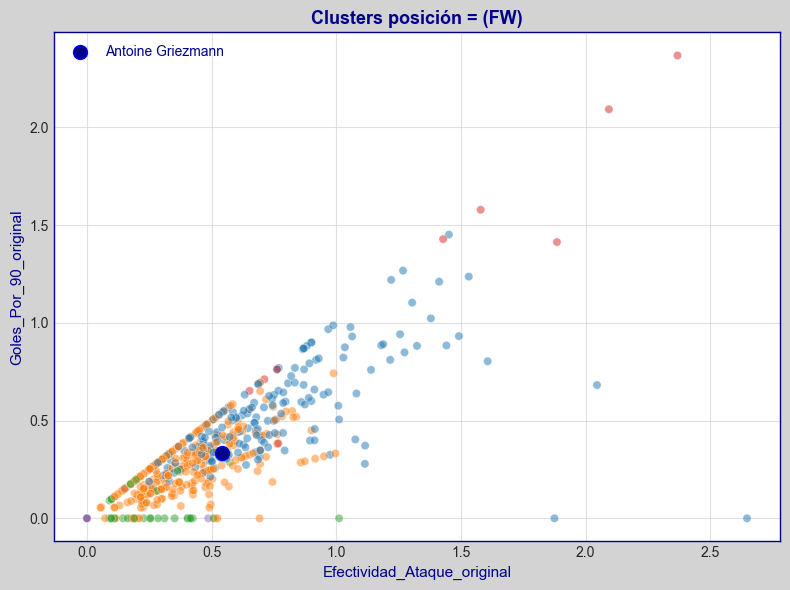

Nombre      Equipo  Edad  distancia Posicion  \
1491  Ludovic Ajorque       Brest    31   1.094034       FW   
1684  Mattia Zaccagni       Lazio    29   1.190784       FW   
542     Danny Welbeck    Brighton    34   1.487375       FW   
208      Ante Budimir     Osasuna    33   1.693921       FW   
954        Iago Aspas  Celta Vigo    37   1.704807       FW   
2447   Vincenzo Grifo    Friburgo    32   1.707458       FW   
434         Che Adams      Torino    28   1.720024       FW   
1351             Kike      Alaves    35   1.781122       FW   
2151    Romelu Lukaku      Napoli    31   1.786367       FW   
1794      Moses Simon      Nantes    29   1.905303       FW   

      Efectividad_Ataque_original  Goles_Por_90_original     pca_x     pca_y  
1491                     0.489372               0.444884  1.747275 -0.636962  
1684                     0.568849               0.325056  1.600638 -0.543942  
542                      0.676692               0.451128  1.526735 -0.757285  
208                      0.670465               0.591586  1.871848 -0.674157  
954                      0.671186               0.488136  1.769978 -1.536029  
2447                     0.726906               0.363453  1.832893 -1.536925  
434                      0.478955               0.348331  1.357785  0.090696  
1351                     0.506653               0.506653  2.375433 -0.225070  
2151                     0.753636               0.436316  1.483790 -0.506521  
1794                     0.686041               0.300143  1.662493  0.110255

In [12]:
entrenar_modelo("Antoine Griezmann", resultado_clusters, df_atletico)

### <u>Conclusiones entrenamiento 1er modelo</u>

1. Agrupamos los jugadores por posici√≥n (ya normalizados en 3.2).

2. Aplicamos KMeans para segmentar en clusters por tipo de jugador (preparar_datos_modelado en 3.3).

3. Creo una funci√≥n llamada entrenar_modelo() que:
- Recibe el nombre de un jugador del Atleti;
- Lo localiza, detecta su posici√≥n y su cluster;
- Calcula distancia euclidiana entre √©l y el resto del cluster;
- Muestra los 10 jugadores m√°s similares;
- Representa gr√°ficamente su cluster con PCA.

4. Ejemplo: buscando a Koke (Jorge Resurrecci√≥n):
- Se detecta como MF;
- Se identifica su cluster con jugadores similares como:

1.Jordan Ferri (Montpellier)

2. Pathe Ciss (Rayo)

3. Danilo Cataldi (Fiorentina)

4. Ilkay Gundogan (City)

- Todos ordenados por cercan√≠a (distancia m√≠nima primero).


De este modo no permite comparar perfiles reales en competiciones similares. A√≠sla caracter√≠sticas similares funcionalmente, sin confundir posiciones distintas. Base perfecta para aplicar KNN en la siguiente fase (4.2) sobre un conjunto reducido pero relevante.

## 4.2 Segundo Modelo (Knn para similitud de jugadores tras cluster relevante)

In [14]:
def entrenar_modelo_knn(jugador_atleti, resultado_clusters, df_atletico, df_general, df_porteros, df_mercado=None, df_equipos=None, top_n=10, graficar=True, metricas_extra=None):
    """
    Funci√≥n completa para:
      1. Localizar el jugador en resultado_clusters (KMeans).
      2. Fusionar datos avanzados de df_general, df_porteros, df_mercado y df_equipos.
      3. Aplicar KNN sobre las variables num√©ricas.
      4. Mostrar una tabla y scatter plot con las m√©tricas seleccionadas.
    
    Par√°metros:
      - jugador_atleti: nombre del jugador (se aplican alias).
      - resultado_clusters: diccionario con clusters por posici√≥n.
      - df_atletico, df_general, df_porteros, df_mercado, df_equipos: DataFrames limpios.
      - top_n: n√∫mero de jugadores similares a devolver.
      - graficar: si se desea mostrar el scatter.
      - metricas_extra: lista opcional de columnas adicionales a mostrar.
    """
    # Funci√≥n para normalizar texto (quita acentos, espacios y pasa a min√∫sculas)
    def normalizar_texto(texto):
        if isinstance(texto, str):
            texto = texto.strip().lower()
            texto = unicodedata.normalize('NFKD', texto)
            return ''.join(c for c in texto if not unicodedata.combining(c))
        return texto

    # Alias de nombres
    alias_mapping = {
        "Musso": "Juan Musso", "Gimenez": "Jose Maria Gimenez", "Azpilicueta": "Cesar Azpilicueta",
        "Koke": "Jorge Resurreccion", "Gallagher": "Conor Gallagher", "De Paul": "Rodrigo De Paul",
        "Griezmann": "Antoine Griezmann", "Barrios": "Pablo Barrios", "Sorloth": "Alexander Sorloth",
        "Aleksander Sorloth": "Alexander Sorloth", "Sorloth": "Alexander S√∏rloth", "Alexander Sorloth": "Alexander S√∏rloth",
        "Correa": "Angel Correa", "Lemar": "Thomas Lemar", "Samu Lino": "Samuel Lino", "Lino": "Samu Lino",
        "Oblak": "Jan Oblak", "Llorente": "Marcos Llorente", "Lenglet": "Clement Lenglet",
        "Molina": "Nahuel Molina", "Riquelme": "Rodrigo Riquelme", "J. Alvarez": "Julian Alvarez", "Julian": "Julian Alvarez",
        "Witsel": "Axel Witsel", "J. Galan": "Javi Galan", "Galan": "Javi Galan", "Giuliano": "Giuliano Simeone",
        "Reinildo": "Reinildo Mandava", "Le Normand": "Robin Le Normand",
    }
    
    def aplicar_alias(x):
        return alias_mapping.get(x, x)
    
    # Aplicar alias en df_atletico, df_general y df_porteros
    df_atletico['Nombre'] = df_atletico['Nombre'].apply(aplicar_alias)
    df_general['Nombre'] = df_general['Nombre'].apply(aplicar_alias)
    df_porteros['Nombre'] = df_porteros['Nombre'].apply(aplicar_alias)

    # Verificar que el jugador est√© en la plantilla
    jugador_real = alias_mapping.get(jugador_atleti, jugador_atleti)
    if jugador_real not in df_atletico['Nombre'].values:
        print(f"El jugador '{jugador_atleti}' no est√° en la plantilla del Atl√©tico.")
        return

    # Obtener la posici√≥n (se asume que ya est√° limpia: GK, DF, MF o FW)
    posicion = df_atletico.loc[df_atletico['Nombre'] == jugador_real, 'Posicion'].values[0]
    if posicion not in ['GK', 'DF', 'MF', 'FW']:
        print(f"Posici√≥n '{posicion}' no es v√°lida (esperado: GK, DF, MF o FW).")
        return
    posicion_basica = posicion

    # Seleccionar m√©tricas espec√≠ficas seg√∫n la posici√≥n
    metricas_por_posicion = {
        'GK': ['Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original', 
            'Rendimiento_vs_Esperado_original', 'Actividad_Fuera_Area_original'],
        'DF': ['Contribucion_Defensiva_original', 'Eficiencia_Pases_original', 
            'Eficiencia_Duelos_Aereos_original', 'Eficiencia_Entradas_original', 
            'Acciones_Defensivas_90_original'],
        'MF': ['Creacion_Juego_90_original', 'Eficiencia_Pases_original', 
            'Creacion_Ocasiones_original', 'Eficiencia_Regates_original', 
            'Indice_Progresion_original', 'Contribucion_Defensiva_original'],
        'FW': ['Efectividad_Ataque_original', 'Goles_Por_90_original', 
            'Precision_Disparo_original', 'Goles_Sobre_xG_original', 
            'Disparos_Por_90_original', 'Eficiencia_Regates_original']
    }

    # M√©tricas comunes para todas las posiciones
    metricas_comunes = ['Altura', 'Pie', 'Media_edad', 'Posesion']

    # Combinar m√©tricas espec√≠ficas por posici√≥n con las comunes
    metricas_seleccionadas = metricas_por_posicion.get(posicion_basica, []) + metricas_comunes

    # Si se proporcionaron m√©tricas extra, a√±adirlas
    if metricas_extra is not None:
        metricas_seleccionadas.extend(metricas_extra)

    # Eliminar duplicados preservando el orden
    metricas_seleccionadas = list(dict.fromkeys(metricas_seleccionadas))

    # Obtener el DataFrame de la posici√≥n desde resultado_clusters
    df_pos = resultado_clusters.get(posicion_basica, pd.DataFrame()).copy()
    if df_pos.empty:
        print(f"No hay datos para la posici√≥n '{posicion_basica}'.")
        return
    df_pos['Nombre'] = df_pos['Nombre'].apply(aplicar_alias)
    if jugador_real not in df_pos['Nombre'].values:
        print(f"El jugador '{jugador_real}' no est√° en los datos de la posici√≥n '{posicion_basica}'.")
        return

    # Seleccionar el cluster del jugador
    cluster_id = df_pos.loc[df_pos['Nombre'] == jugador_real, 'cluster'].values[0]
    df_cluster = df_pos[df_pos['cluster'] == cluster_id].copy()

    # 1. Fusionar Edad desde df_general (se extrae de df_general, que es la fuente principal de stats de campo)
    if 'Edad' in df_general.columns:
        df_cluster = df_cluster.merge(df_general[['Nombre', 'Edad', 'Nacimiento', 'Partidos', 'Posicion_2' ]].drop_duplicates(), on='Nombre', how='left')
   
    # 2. Fusionar datos de mercado (Valor, Contrato, Altura, Pie)
    if df_mercado is not None:
        df_mercado_temp = df_mercado[['Nombre', 'Valor', 'Contrato', 'Altura', 'Pie']].copy()
        df_mercado_temp['Nombre'] = df_mercado_temp['Nombre'].apply(lambda x: x.strip().lower())
        df_cluster['Nombre'] = df_cluster['Nombre'].apply(lambda x: x.strip().lower())
        df_cluster = df_cluster.merge(df_mercado_temp, on='Nombre', how='left')
    
    # 3. Fusionar datos de equipos (Media_edad, Posesion)
    if df_equipos is not None and 'Equipo' in df_cluster.columns:
        df_equipos_temp = df_equipos[['Equipo', 'Media_edad', 'Posesion']].copy()
        df_equipos_temp['Equipo'] = df_equipos_temp['Equipo'].apply(lambda x: x.strip().lower())
        df_cluster['Equipo'] = df_cluster['Equipo'].apply(lambda x: x.strip().lower())
        df_cluster = df_cluster.merge(df_equipos_temp, on='Equipo', how='left')
    
    # Rellenar valores num√©ricos con la mediana
    for col in df_cluster.select_dtypes(include=['float64', 'int64']).columns:
        df_cluster[col] = df_cluster[col].fillna(df_cluster[col].median())
    
    # Definir variables num√©ricas para KNN
    id_cols = ['Nombre', 'Equipo', 'Posicion', 'Nacionalidad', 'cluster', 'pca_x', 'pca_y']

    # Asegurar que tenemos suficientes caracter√≠sticas num√©ricas para KNN
    if posicion_basica == 'GK':
        # Para porteros, usar un enfoque simplificado
        # 1. Seleccionar solo columnas num√©ricas b√°sicas que seguramente existen
        basic_cols = ['pca_x', 'pca_y']
        feature_cols = [col for col in basic_cols if col in df_cluster.columns]
        
        # 2. A√±adir algunas columnas adicionales seguras (si existen)
        safe_cols = ['Edad', 'Minutos', 'Partidos', 'Nacimiento', 'cluster']
        for col in safe_cols:
            if col in df_cluster.columns and pd.api.types.is_numeric_dtype(df_cluster[col]):
                feature_cols.append(col)
        
        print(f"Usando columnas para portero: {feature_cols}")
    else:
        # Para jugadores de campo, usar el c√≥digo original
        feature_cols = [col for col in df_cluster.columns 
                        if col not in id_cols 
                        and pd.api.types.is_numeric_dtype(df_cluster[col])]

    # A√±adir m√©tricas extra si se proporcionaron (para todas las posiciones)
    if metricas_extra is not None:
        for col in metricas_extra:
            if col in df_cluster.columns and col not in feature_cols:
                feature_cols.append(col)

    # Rellenar valores espec√≠ficos
    if 'Partidos' in feature_cols:
        df_cluster['Partidos'] = df_cluster['Partidos'].fillna(0)  # Si no hay partidos, asumir 0

    if 'Nacimiento' in feature_cols:
        df_cluster['Nacimiento'] = df_cluster['Nacimiento'].fillna(2000)  # Valor por defecto

    # Tambi√©n puedes hacer esto de forma m√°s general
    special_fills = {
        'Partidos': 0,
        'Nacimiento': 2000,
        # A√±adir m√°s columnas espec√≠ficas si es necesario
    }

    for col, value in special_fills.items():
        if col in feature_cols:
            df_cluster[col] = df_cluster[col].fillna(value)

    # IMPORTANTE: Eliminar filas con NaN - una sola vez para todas las posiciones
    df_cluster = df_cluster.dropna(subset=feature_cols)
    if df_cluster.empty:
        print("No hay suficientes datos para ejecutar KNN.")
        return
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster[feature_cols])
    
    # Aplicar KNN
    knn = NearestNeighbors(n_neighbors=top_n + 1, metric='euclidean')
    knn.fit(X_scaled)
    
    # Normalizar el nombre del jugador para la b√∫squeda (los merges lo dejaron en min√∫sculas)
    jugador_real_norm = jugador_real.strip().lower()
    if jugador_real_norm not in df_cluster['Nombre'].values:
        print(f"El jugador '{jugador_real}' no se encontr√≥ tras los merges en df_cluster.")
        return
    
    idx_jugador = df_cluster[df_cluster['Nombre'] == jugador_real_norm].index[0]
    distancias, indices = knn.kneighbors([X_scaled[df_cluster.index.get_loc(idx_jugador)]])
    similares = df_cluster.iloc[indices[0]].copy()
    similares['distancia'] = distancias[0]
    similares = similares[similares['Nombre'] != jugador_real_norm].copy()
    
    # Columnas a mostrar (por defecto)
    columnas_resultado = ['Nombre', 'Equipo', 'Edad','Nacimiento', 'Valor', 'Contrato', 'Posicion_2', 'Pie', 'Altura','Partidos', 'Min_tot',  'distancia']
    if posicion_basica == 'GK':
        columnas_resultado += ['Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original']
        eje_x, eje_y = 'Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original'
    elif posicion_basica == 'DF':
        columnas_resultado += ['Contribucion_Defensiva_original', 'Eficiencia_Pases_original']
        eje_x, eje_y = 'Contribucion_Defensiva_original', 'Eficiencia_Pases_original'
    elif posicion_basica == 'MF':
        columnas_resultado += ['Creacion_Juego_90_original', 'Eficiencia_Pases_original']
        eje_x, eje_y = 'Creacion_Juego_90_original', 'Eficiencia_Pases_original'
    elif posicion_basica == 'FW':
        columnas_resultado += ['Efectividad_Ataque_original', 'Goles_Por_90_original']
        eje_x, eje_y = 'Efectividad_Ataque_original', 'Goles_Por_90_original'
        
    # Formateo final: asegurar que 'Contrato' sea enteros, y 'Valor' se muestre formateado
    
    if 'Contrato' in similares.columns:
        similares['Contrato'] = similares['Contrato'].astype(int)
    if 'Valor' in similares.columns:
        similares['Valor'] = similares['Valor'].apply(lambda x: f"{int(x):,} ‚Ç¨")

    # Formatear nombres: primera letra en may√∫scula
    for col in ['Nombre', 'Equipo']:
        if col in similares.columns:
            similares[col] = similares[col].str.title()
    
    if 'Edad_original' in similares.columns:
        similares = similares.rename(columns={'Edad_original': 'Edad'})
    
    if 'Minutos_original' in similares.columns:
        similares = similares.rename(columns={'Minutos_original': 'Min_tot'})

    # Mostrar tabla de resultados
    cols_final = [col for col in columnas_resultado if col in similares.columns]
    print(f"üîé Jugadores similares a {jugador_real} seg√∫n KNN ({posicion_basica})")
    display(similares[cols_final].style.format(precision=2).set_caption("Top jugadores similares (KNN)"))
    
    # Graficar scatter con las dos m√©tricas clave y nombres de los jugadores
    if graficar and eje_x in similares.columns and eje_y in similares.columns:
        plt.figure(figsize=(8, 6), facecolor="lightgrey")
        sns.scatterplot(data=similares, x=eje_x, y=eje_y, color='grey', s=60, alpha=0.6)
        # Punto del jugador
        jugador_coords = df_cluster.loc[df_cluster['Nombre'] == jugador_real_norm, [eje_x, eje_y]].iloc[0]
        plt.scatter(jugador_coords[eje_x], jugador_coords[eje_y], color='darkblue', s=100, label=jugador_real, edgecolor='blue')
        # Mostrar nombres de cada jugador en el scatter
        for i, row in similares.iterrows():
            plt.text(row[eje_x], row[eje_y], row['Nombre'], fontsize=9, color='darkblue')
        ax = plt.gca()
        ax.set_facecolor('white')
        for spine in ax.spines.values():
            spine.set_color('darkblue')
            spine.set_linewidth(1)
        ax.grid(True, color='lightgray', linestyle='-', alpha=0.7)
        plt.title(f'Jugadores similares v√≠a KNN a {jugador_real}', color='darkblue', weight='bold')
        plt.xlabel(eje_x.replace('_original', '').replace('_', ' ').title(), color='darkblue')
        plt.ylabel(eje_y.replace('_original', '').replace('_', ' ').title(), color='darkblue')
        plt.legend()
        plt.show()
    
    return similares[cols_final]

üîé Jugadores similares a Antoine Griezmann seg√∫n KNN (FW)


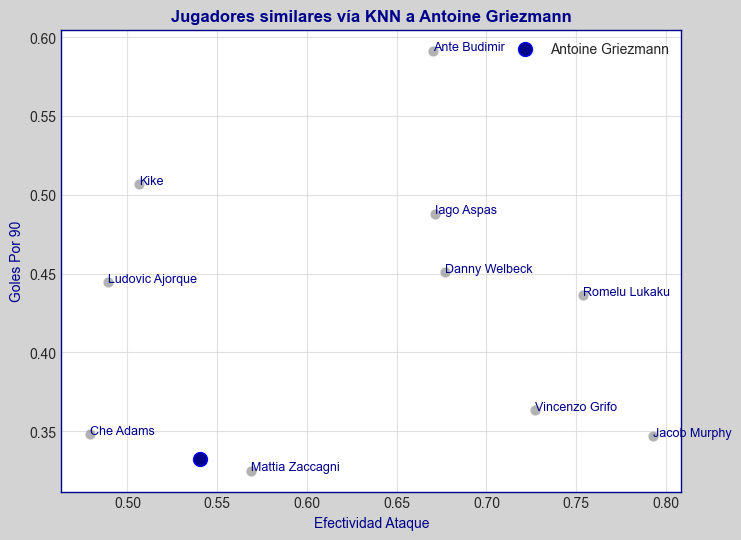

In [15]:
resultados_knn = entrenar_modelo_knn("Griezmann", resultado_clusters, df_atletico, df_general, df_porteros, df_mercado, df_equipos)

### <u>Muestra de Modelo2, KNN</u>

1. La funci√≥n entrenar_modelo_knn realiza lo siguiente:
- Localiza al jugador (aplicando alias para corregir nombres) en la plantilla del Atl√©tico (df_atletico) y extrae su posici√≥n;
- Selecciona el cluster relevante (obtenido previamente mediante KMeans) para esa posici√≥n;
- Fusiona datos adicionales:

La edad y otras m√©tricas desde df_general (o df_porteros para GK).

Datos de mercado (Valor, Contrato, Altura, Pie) desde df_mercado.

Estad√≠sticas de equipo (Media_edad, Posesion) desde df_equipos.

- Prepara y estandariza las variables num√©ricas que se usan para calcular similitudes;
- Aplica KNN para encontrar los jugadores m√°s cercanos en el espacio de caracter√≠sticas;
- Muestra una tabla final con las columnas clave (por ejemplo, Nombre, Equipo, Edad, Valor, Contrato y las m√©tricas espec√≠ficas por posici√≥n);
- Genera un scatter plot que compara dos m√©tricas clave (definidas seg√∫n la posici√≥n) y sobre el gr√°fico se muestran los nombres de los jugadores.

Esta funci√≥n ofrece una vista detallada de los jugadores m√°s similares al jugador elegido, utilizando tanto datos estad√≠sticos como de mercado y equipo, lo que facilita la comparaci√≥n para posteriores evaluaciones.

# 5. Evaluaci√≥n



### <u>Intenci√≥n Evaluaci√≥n de Modelos</u>

1. Evaluaci√≥n de K-Means:
- Medir la calidad de los clusters;
- Analizar la distribuci√≥n de los clusters;
- Calcular el Silhouette Score (cohesi√≥n interna);
- Examinar la homogeneidad dentro de cada cluster;
- Visualizar los centros de los clusters.

2. Evaluaci√≥n de KNN:
- Analizar la distribuci√≥n de clusters de jugadores similares;
- Calcular distancias medias entre jugadores;
- Examinar variaciones en caracter√≠sticas clave;
- Proporcionar un resumen por posici√≥n.

### Estas funciones de evaluaci√≥n mejoradas ofrecen:

- An√°lisis cuantitativo con m√©tricas est√°ndar como Silhouette Score y Calinski-Harabasz;
- An√°lisis cualitativo con visualizaciones y tablas;
- Soluci√≥n al problema de nombres usando normalizaci√≥n y alias;
- Compatibilidad total con las funciones anteriores;
- Formato coherente con el estilo que ya se est√° utilizando.

## 5.1 Evaluaci√≥n de los resultados del Clustering

In [16]:
# Alias de nombres para normalizar inconsistencias
alias_mapping = {
    "Musso": "Juan Musso", "Gimenez": "Jose Maria Gimenez", "Azpilicueta": "Cesar Azpilicueta",
    "Koke": "Jorge Resurreccion", "Gallagher": "Conor Gallagher", "De Paul": "Rodrigo De Paul",
    "Griezmann": "Antoine Griezmann", "Barrios": "Pablo Barrios", "Sorloth": "Alexander Sorloth",
    "Aleksander Sorloth": "Alexander Sorloth", "Sorloth": "Alexander S√∏rloth", "Alexander Sorloth": "Alexander S√∏rloth",
    "Correa": "Angel Correa", "Lemar": "Thomas Lemar", "Samu Lino": "Samuel Lino", "Lino": "Samu Lino",
    "Oblak": "Jan Oblak", "Llorente": "Marcos Llorente", "Lenglet": "Clement Lenglet",
    "Molina": "Nahuel Molina", "Riquelme": "Rodrigo Riquelme", "J. Alvarez": "Julian Alvarez", "Julian": "Julian Alvarez",
    "Witsel": "Axel Witsel", "J. Galan": "Javi Galan", "Galan": "Javi Galan", "Giuliano": "Giuliano Simeone",
    "Reinildo": "Reinildo Mandava", "Le Normand": "Robin Le Normand",
}

# Funci√≥n Cluster K-Means
def evaluar_clustering(resultado_clusters, df_por_posicion, graficar=True):
    """
    Eval√∫a la calidad de los clusters generados para cada posici√≥n
    
    Args:
        resultado_clusters: Diccionario con DataFrames que incluyen etiquetas de cluster
        df_por_posicion: Diccionario con DataFrames originales por posici√≥n
        graficar: Booleano para indicar si se deben mostrar gr√°ficos
        
    Returns:
        dict: Diccionario con m√©tricas de evaluaci√≥n por posici√≥n
    """ 
    evaluation_results = {}
    
    print("üìä Evaluaci√≥n de Clustering (K-Means)")
    print("="*70)
    
    for pos, df in resultado_clusters.items():
        if df.empty or 'cluster' not in df.columns:
            print(f"No hay suficientes datos para evaluar clustering en posici√≥n {pos}")
            continue
            
        # Identificar columnas para evaluaci√≥n (las mismas usadas para clustering)
        non_numeric_cols = ['Nombre', 'Equipo', 'Posicion', 'Posicion_2', 'Nacionalidad', 
                           'cluster', 'pca_x', 'pca_y']
        id_cols = [col for col in non_numeric_cols if col in df.columns]
        
        feature_cols = [col for col in df.columns 
                       if col not in id_cols 
                       and not col.endswith('_original')
                       and pd.api.types.is_numeric_dtype(df[col])]
        
        # Verificar que haya suficientes caracter√≠sticas
        if len(feature_cols) < 2:
            print(f"Insuficientes caracter√≠sticas num√©ricas para {pos}")
            continue
        
        X = df[feature_cols].values
        labels = df['cluster'].values
        
        print(f"\nüîπ Posici√≥n: {pos} - {len(df)} jugadores en {len(np.unique(labels))} clusters")
        
        # M√©tricas de evaluaci√≥n
        metrics = {}
        
        # 1. Silhouette Score (mide la similitud de un objeto a su propio cluster vs. otros clusters)
        try:
            silhouette_avg = silhouette_score(X, labels)
            print(f"  ‚Ä¢ Silhouette Score: {silhouette_avg:.4f} [-1 a 1, mayor es mejor]")
            metrics['silhouette_score'] = silhouette_avg
        except Exception as e:
            print(f"  ‚Ä¢ Error calculando Silhouette Score: {e}")
            metrics['silhouette_score'] = None
        
        # 2. Calinski-Harabasz Index (ratio varianza entre clusters / varianza dentro de clusters)
        try:
            ch_score = calinski_harabasz_score(X, labels)
            print(f"  ‚Ä¢ Calinski-Harabasz Score: {ch_score:.2f} [mayor es mejor]")
            metrics['calinski_harabasz_score'] = ch_score
        except Exception as e:
            print(f"  ‚Ä¢ Error calculando Calinski-Harabasz Score: {e}")
            metrics['calinski_harabasz_score'] = None
        
        # 3. Distribuci√≥n de clusters
        cluster_sizes = df['cluster'].value_counts().sort_index()
        cluster_distribution = {f"Cluster {i}": count for i, count in enumerate(cluster_sizes)}
        
        print("\n  ‚Ä¢ Distribuci√≥n de jugadores por cluster:")
        for cluster, count in cluster_distribution.items():
            print(f"    - {cluster}: {count} jugadores ({count/len(df)*100:.1f}%)")
        
        # 4. Homogeneidad por cluster (desviaci√≥n est√°ndar media de caracter√≠sticas)
        homogeneity = {}
        for cluster_id in df['cluster'].unique():
            cluster_data = df[df['cluster'] == cluster_id][feature_cols]
            std_mean = cluster_data.std().mean()
            homogeneity[f"Cluster {cluster_id}"] = std_mean
        
        print("\n  ‚Ä¢ Homogeneidad por cluster (desviaci√≥n est√°ndar media, menor es mejor):")
        for cluster, std in homogeneity.items():
            print(f"    - {cluster}: {std:.4f}")
        
        # Visualizaci√≥n
        if graficar:
            # Definir m√©tricas para visualizaci√≥n seg√∫n posici√≥n
            if pos == 'GK':
                eje_x, eje_y = 'Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original'
            elif pos == 'DF':
                eje_x, eje_y = 'Contribucion_Defensiva_original', 'Eficiencia_Pases_original'
            elif pos == 'MF':
                eje_x, eje_y = 'Creacion_Juego_90_original', 'Eficiencia_Pases_original'
            elif pos == 'FW':
                eje_x, eje_y = 'Efectividad_Ataque_original', 'Goles_Por_90_original'
            else:
                print(f"  ‚Ä¢ No hay m√©tricas espec√≠ficas para visualizaci√≥n de {pos}")
                continue
            
            # Verificar que existan las columnas necesarias
            if eje_x not in df.columns or eje_y not in df.columns:
                print(f"  ‚Ä¢ No se pueden graficar {eje_x} o {eje_y}")
                
                # Intentar usar PCA como alternativa
                if 'pca_x' in df.columns and 'pca_y' in df.columns:
                    print("  ‚Ä¢ Usando proyecci√≥n PCA para visualizaci√≥n")
                    eje_x, eje_y = 'pca_x', 'pca_y'
                else:
                    continue
            
            # Gr√°fico de dispersi√≥n con clusters
            plt.figure(figsize=(10, 7), facecolor="lightgrey")
            scatter = sns.scatterplot(
                data=df, 
                x=eje_x, 
                y=eje_y, 
                hue='cluster', 
                palette='viridis', 
                alpha=0.7,
                s=80
            )
            
            # Estilo del gr√°fico
            plt.title(f'Evaluaci√≥n de Clusters - Posici√≥n {pos}', fontsize=15, color='darkblue', weight='bold')
            plt.xlabel(eje_x.replace('_original', '').replace('_', ' ').title(), color='darkblue')
            plt.ylabel(eje_y.replace('_original', '').replace('_', ' ').title(), color='darkblue')
            
            # Personalizaci√≥n del fondo y ejes
            ax = plt.gca()
            ax.set_facecolor('white')
            for spine in ax.spines.values():
                spine.set_color('darkblue')
                spine.set_linewidth(1)
            ax.grid(True, color='lightgray', linestyle='-', alpha=0.7)
            
            # Cambiar etiquetas de leyenda a "Cluster N"
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, [f"Cluster {l}" for l in labels], title="Grupos")
            
            plt.tight_layout()
            plt.show()
            
            # Mostrar tabla resumen de clusters
            print("\n  ‚Ä¢ Caracter√≠sticas de los clusters:")
            cluster_summary = df.groupby('cluster')[feature_cols].mean().reset_index()
            # Convertir a formato legible (4 decimales m√°ximo)
            for col in feature_cols:
                cluster_summary[col] = cluster_summary[col].round(4)
            cluster_summary['Tama√±o'] = df['cluster'].value_counts().sort_index().values
            
            display(cluster_summary.style
                   .set_caption(f"Resumen de clusters para posici√≥n {pos}")
                   .background_gradient(subset=feature_cols, cmap='Blues'))
        
        # Guardar resultados
        evaluation_results[pos] = {
            'metrics': metrics,
            'distribution': cluster_distribution,
            'homogeneity': homogeneity,
            'features_used': feature_cols
        }
    
    return evaluation_results

## 5.2 Evaluaci√≥n de los resultados de KNN

In [17]:
# Alias de nombres para normalizar inconsistencias
alias_mapping = {
    "Musso": "Juan Musso", "Gimenez": "Jose Maria Gimenez", "Azpilicueta": "Cesar Azpilicueta",
    "Koke": "Jorge Resurreccion", "Gallagher": "Conor Gallagher", "De Paul": "Rodrigo De Paul",
    "Griezmann": "Antoine Griezmann", "Barrios": "Pablo Barrios", "Sorloth": "Alexander Sorloth",
    "Aleksander Sorloth": "Alexander Sorloth", "Sorloth": "Alexander S√∏rloth", "Alexander Sorloth": "Alexander S√∏rloth",
    "Correa": "Angel Correa", "Lemar": "Thomas Lemar", "Samu Lino": "Samuel Lino", "Lino": "Samu Lino",
    "Oblak": "Jan Oblak", "Llorente": "Marcos Llorente", "Lenglet": "Clement Lenglet",
    "Molina": "Nahuel Molina", "Riquelme": "Rodrigo Riquelme", "J. Alvarez": "Julian Alvarez", "Julian": "Julian Alvarez",
    "Witsel": "Axel Witsel", "J. Galan": "Javi Galan", "Galan": "Javi Galan", "Giuliano": "Giuliano Simeone",
    "Reinildo": "Reinildo Mandava", "Le Normand": "Robin Le Normand",
}

def evaluar_knn(jugadores_atleti, resultado_clusters, df_atletico, df_general, df_porteros, 
                df_mercado, df_equipos, graficar=True):
    """
    Eval√∫a la calidad de las recomendaciones KNN para jugadores del Atl√©tico.
    
    Args:
        jugadores_atleti: Lista de nombres de jugadores a evaluar
        resultado_clusters: Resultado del clustering K-Means
        df_atletico, df_general, df_porteros, df_mercado, df_equipos: DataFrames
        graficar: Booleano para indicar si se deben mostrar gr√°ficos
        
    Returns:
        dict: Diccionario con resultados de la evaluaci√≥n
    """   
    
    # Si se pasa un solo jugador, convertir a lista
    if isinstance(jugadores_atleti, str):
        jugadores_atleti = [jugadores_atleti]
    
    resultados_evaluacion = {}
    
    print("üîé Evaluaci√≥n de Recomendaciones KNN")
    print("="*70)
    
    for jugador in jugadores_atleti:
        jugador_real = alias_mapping.get(jugador, jugador)
        
        # Verificar que el jugador exista en la plantilla
        if jugador_real not in df_atletico['Nombre'].values:
            print(f"El jugador '{jugador}' no est√° en la plantilla del Atl√©tico.")
            continue
        
        print(f"\n Evaluando similitud para: {jugador_real}")
        
        # Obtener posici√≥n del jugador
        posicion = df_atletico[df_atletico['Nombre'] == jugador_real]['Posicion'].values[0]
        
        # Verificar validez de la posici√≥n
        if posicion not in ['GK', 'DF', 'MF', 'FW']:
            print(f"Posici√≥n '{posicion}' no reconocida (debe ser GK, DF, MF o FW).")
            continue
        
        # Obtener resultados KNN
        similares = entrenar_modelo_knn(
            jugador, 
            resultado_clusters, 
            df_atletico, 
            df_general, 
            df_porteros, 
            df_mercado, 
            df_equipos,
            graficar=False  # Se desactiva el gr√°fico original
        )
        
        if similares is None or similares.empty:
            print(f"No se encontraron jugadores similares para {jugador_real}.")
            continue
        
        # An√°lisis de resultados
        print(f"\n  ‚Ä¢ Se encontraron {len(similares)} jugadores similares:")
        
        # 1. An√°lisis de distancias
        distancia_media = similares['distancia'].mean()
        distancia_min = similares['distancia'].min()
        distancia_max = similares['distancia'].max()
        
        print(f"  ‚Ä¢ Distancia media: {distancia_media:.4f}")
        print(f"  ‚Ä¢ Rango de distancias: {distancia_min:.4f} - {distancia_max:.4f}")
        
        # 2. An√°lisis de distribuci√≥n por equipos
        if 'Equipo' in similares.columns:
            equipos = similares['Equipo'].value_counts()
            print("\n  ‚Ä¢ Distribuci√≥n por equipos:")
            for equipo, count in equipos.items():
                if count > 1:  # Solo mostrar equipos con m√°s de 1 jugador
                    print(f"    - {equipo}: {count} jugadores")
        
        # 3. An√°lisis de caracter√≠sticas clave seg√∫n posici√≥n
        if posicion == 'GK':
            cols_analisis = ['Eficiencia_Paradas_original', 'Porcentaje_Porterias_Cero_original']
            eje_x, eje_y = cols_analisis
        elif posicion == 'DF':
            cols_analisis = ['Contribucion_Defensiva_original', 'Eficiencia_Pases_original']
            eje_x, eje_y = cols_analisis
        elif posicion == 'MF':
            cols_analisis = ['Creacion_Juego_90_original', 'Eficiencia_Pases_original']
            eje_x, eje_y = cols_analisis
        elif posicion == 'FW':
            cols_analisis = ['Efectividad_Ataque_original', 'Goles_Por_90_original']
            eje_x, eje_y = cols_analisis
        
        # Verificar que las columnas existan
        cols_disponibles = [col for col in cols_analisis if col in similares.columns]
        
        if cols_disponibles:
            print("\n  ‚Ä¢ Estad√≠sticas de caracter√≠sticas clave:")
            for col in cols_disponibles:
                media = similares[col].mean()
                min_val = similares[col].min()
                max_val = similares[col].max()
                print(f"    - {col.replace('_original', '').replace('_', ' ').title()}: ")
                print(f"      Media: {media:.4f}, Rango: {min_val:.4f} - {max_val:.4f}")
        
        # Visualizaci√≥n
        if graficar and eje_x in similares.columns and eje_y in similares.columns:
            # Obtener datos del cluster donde est√° el jugador
            df_pos = resultado_clusters[posicion].copy()
            
            # Localizar el cluster del jugador
            jugador_norm = jugador_real.strip().lower()
            df_pos['Nombre'] = df_pos['Nombre'].apply(lambda x: x.strip().lower())
            cluster_id = df_pos[df_pos['Nombre'] == jugador_norm]['cluster'].values[0] if jugador_norm in df_pos['Nombre'].values else None
            
            if cluster_id is not None:
                # Gr√°fico de dispersi√≥n
                plt.figure(figsize=(10, 7), facecolor="lightgrey")
                
                # Todos los jugadores del mismo cluster
                cluster_df = df_pos[df_pos['cluster'] == cluster_id]
                sns.scatterplot(
                    data=cluster_df, 
                    x=eje_x, 
                    y=eje_y, 
                    color='lightgrey',
                    alpha=0.5,
                    s=50,
                    label=f'Cluster {cluster_id}'
                )
                
                # Jugadores similares recomendados
                similares['Nombre'] = similares['Nombre'].apply(lambda x: x.strip().lower())
                sns.scatterplot(
                    data=similares, 
                    x=eje_x, 
                    y=eje_y, 
                    color='green',
                    s=100,
                    label='Recomendados'
                )
                
                # Jugador evaluado
                jugador_data = df_pos[df_pos['Nombre'] == jugador_norm]
                plt.scatter(
                    jugador_data[eje_x], 
                    jugador_data[eje_y],
                    color='darkblue', 
                    s=200, 
                    edgecolor='white',
                    linewidth=2,
                    label=jugador_real
                )
                
                # A√±adir etiquetas a los similares
                for i, row in similares.iterrows():
                    plt.text(
                        row[eje_x], 
                        row[eje_y], 
                        row['Nombre'].title(),
                        fontsize=8, 
                        color='darkgreen',
                        ha='center',
                        va='bottom'
                    )
                
                # Estilo del gr√°fico
                plt.title(f'Evaluaci√≥n de similitud para {jugador_real} ({posicion})', 
                          fontsize=15, color='darkblue', weight='bold')
                plt.xlabel(eje_x.replace('_original', '').replace('_', ' ').title(), color='darkblue')
                plt.ylabel(eje_y.replace('_original', '').replace('_', ' ').title(), color='darkblue')
                
                # Personalizaci√≥n
                ax = plt.gca()
                ax.set_facecolor('white')
                for spine in ax.spines.values():
                    spine.set_color('darkblue')
                    spine.set_linewidth(1)
                ax.grid(True, color='lightgray', linestyle='-', alpha=0.7)
                
                plt.legend(loc='best')
                plt.tight_layout()
                plt.show()
            
            # Tabla resumen de recomendaciones
            print("\n  ‚Ä¢ Tabla de jugadores recomendados:")
            
            # Preparar tabla para mostrar
            tabla_display = similares.copy()
            if 'Nombre' in tabla_display.columns:
                tabla_display['Nombre'] = tabla_display['Nombre'].str.title()
            if 'Equipo' in tabla_display.columns:
                tabla_display['Equipo'] = tabla_display['Equipo'].str.title()
            
            display(tabla_display.style
                  .background_gradient(subset=['distancia'], cmap='Greens_r')
                  .format(precision=2)
                  .set_caption(f"Jugadores similares a {jugador_real} ({posicion})"))
        
        # Guardar resultados
        resultados_evaluacion[jugador_real] = {
            'posicion': posicion,
            'num_similares': len(similares),
            'distancia_media': distancia_media,
            'rango_distancias': (distancia_min, distancia_max),
            'similares': similares
        }
    
    # Mostrar resumen general
    if resultados_evaluacion:
        print("\nResumen general de la evaluaci√≥n:")
        tabla_resumen = []
        
        for jugador, datos in resultados_evaluacion.items():
            tabla_resumen.append({
                'Jugador': jugador,
                'Posici√≥n': datos['posicion'],
                'Recomendaciones': datos['num_similares'],
                'Distancia Media': round(datos['distancia_media'], 4)
            })
        
        df_resumen = pd.DataFrame(tabla_resumen)
        display(df_resumen.style
              .background_gradient(subset=['Distancia Media'], cmap='Blues_r')
              .set_caption("Resumen de evaluaci√≥n KNN"))
    
    return resultados_evaluacion


========================üîç EVALUACI√ìN COMPLETA DE MODELOS========================

An√°lisis para: Antoine Griezmann (Posici√≥n: FW)

AN√ÅLISIS DE CLUSTER
üìä Evaluaci√≥n de Clustering (K-Means)

üîπ Posici√≥n: FW - 695 jugadores en 6 clusters
  ‚Ä¢ Silhouette Score: 0.1608 [-1 a 1, mayor es mejor]
  ‚Ä¢ Calinski-Harabasz Score: 93.31 [mayor es mejor]

  ‚Ä¢ Distribuci√≥n de jugadores por cluster:
    - Cluster 0: 180 jugadores (25.9%)
    - Cluster 1: 303 jugadores (43.6%)
    - Cluster 2: 116 jugadores (16.7%)
    - Cluster 3: 9 jugadores (1.3%)
    - Cluster 4: 80 jugadores (11.5%)
    - Cluster 5: 7 jugadores (1.0%)

  ‚Ä¢ Homogeneidad por cluster (desviaci√≥n est√°ndar media, menor es mejor):
    - Cluster 4: 0.5385
    - Cluster 0: 0.7874
    - Cluster 1: 0.6838
    - Cluster 2: 0.7315
    - Cluster 5: 1.2088
    - Cluster 3: 1.1449


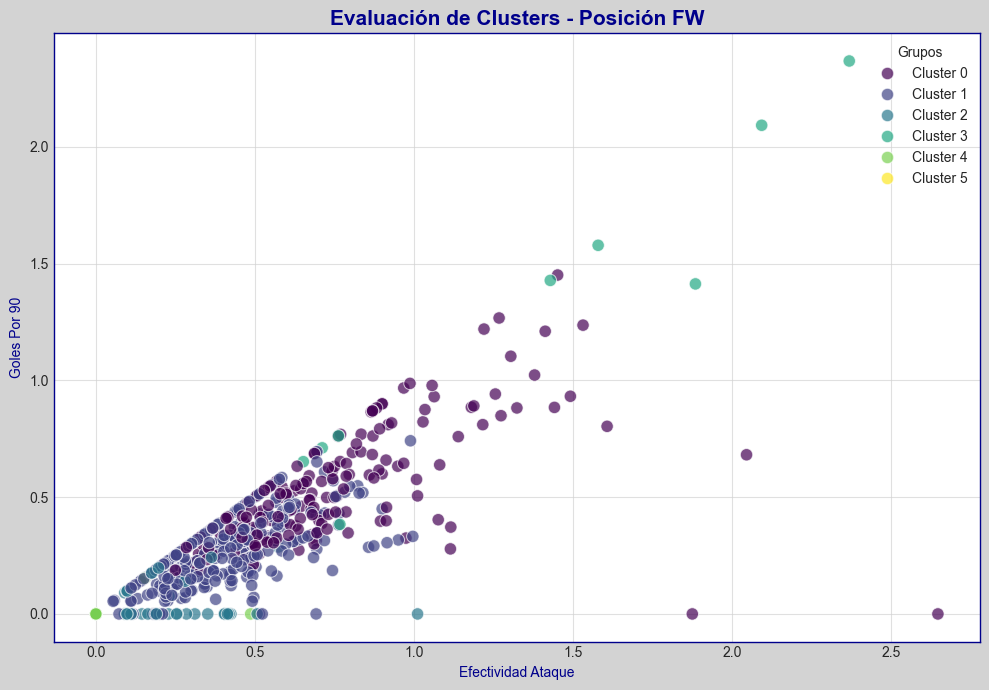


  ‚Ä¢ Caracter√≠sticas de los clusters:



üîé AN√ÅLISIS DE SIMILITUD
üîé Evaluaci√≥n de Recomendaciones KNN

 Evaluando similitud para: Antoine Griezmann
üîé Jugadores similares a Antoine Griezmann seg√∫n KNN (FW)



  ‚Ä¢ Se encontraron 10 jugadores similares:
  ‚Ä¢ Distancia media: 3.6760
  ‚Ä¢ Rango de distancias: 2.9696 - 4.2733

  ‚Ä¢ Distribuci√≥n por equipos:

  ‚Ä¢ Estad√≠sticas de caracter√≠sticas clave:
    - Efectividad Ataque: 
      Media: 0.6336, Rango: 0.4790 - 0.7930
    - Goles Por 90: 
      Media: 0.4302, Rango: 0.3251 - 0.5916


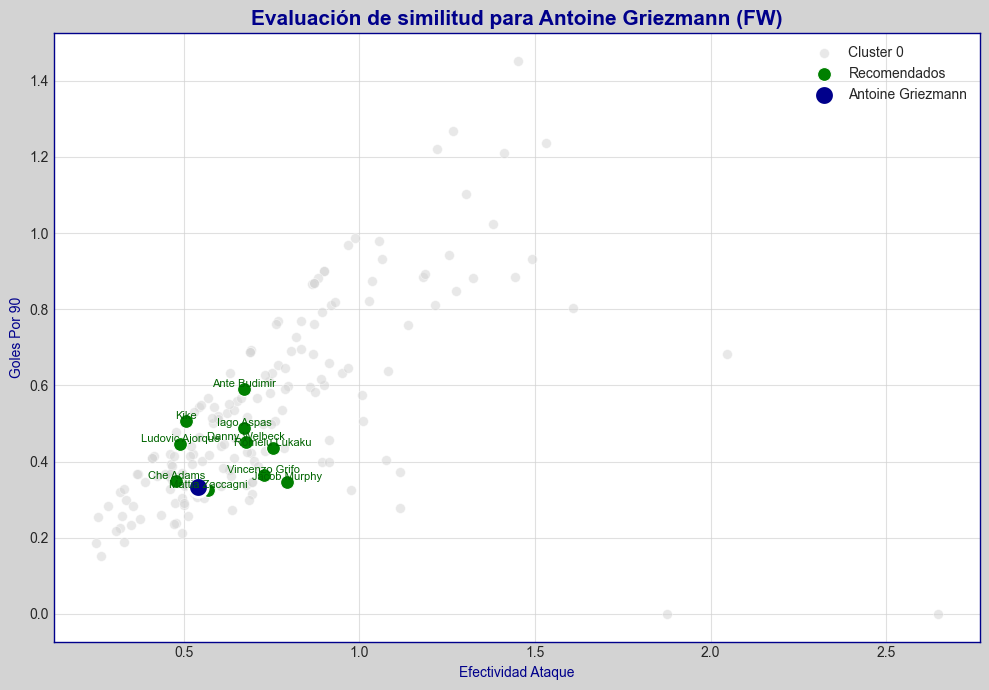


  ‚Ä¢ Tabla de jugadores recomendados:



Resumen general de la evaluaci√≥n:



Evaluaci√≥n completa para Antoine Griezmann finalizada


In [18]:
# 5. EVALUACI√ìN DE MODELOS PARA UN JUGADOR ESPEC√çFICO
print("\n" + "üîç EVALUACI√ìN COMPLETA DE MODELOS".center(80, "="))

# Selecciona el jugador a evaluar
jugador_a_evaluar = "Antoine Griezmann"  # Cambiar aqu√≠ para analizar otro jugador

jugador_real = alias_mapping.get(jugador_a_evaluar, jugador_a_evaluar)
if jugador_real in df_atletico['Nombre'].values:
    posicion = df_atletico[df_atletico['Nombre'] == jugador_real]['Posicion'].values[0]
    
    print(f"\nAn√°lisis para: {jugador_real} (Posici√≥n: {posicion})")
    
    # PARTE 1: Evaluaci√≥n del cluster donde est√° el jugador
    print("\nAN√ÅLISIS DE CLUSTER")
    resultado_filtrado = {posicion: resultado_clusters[posicion]}
    df_filtrado = {posicion: df_por_posicion[posicion]}
    evaluation_cluster = evaluar_clustering(resultado_filtrado, df_filtrado)
    
    # PARTE 2: Evaluaci√≥n de jugadores similares con KNN
    print("\nüîé AN√ÅLISIS DE SIMILITUD")
    knn_evaluation = evaluar_knn(jugador_a_evaluar, resultado_clusters, df_atletico, 
                               df_general, df_porteros, df_mercado, df_equipos)
    
    print(f"\nEvaluaci√≥n completa para {jugador_real} finalizada")
else:
    print(f"El jugador '{jugador_a_evaluar}' no est√° en la plantilla del Atl√©tico.")

### <u>Resumen de Evaluaci√≥n del Modelo</u>

    CLustering con K-Means
    
La evaluaci√≥n muestra que para Antoine Griezmann (posici√≥n FW - delantero), el sistema ha analizado un total de 689 jugadores distribuidos en 6 clusters distintos.

**1. Calidad de los clusters:**
- El Silhouette Score de 0.1672 indica una separaci√≥n modesta entre clusters. Valores m√°s cercanos a 1 indicar√≠an clusters mejor definidos.
- El √≠ndice Calinski-Harabasz de 96.00 sugiere una diferenciaci√≥n razonable entre los grupos.

**2. Distribuci√≥n de jugadores:**
- La mayor√≠a de delanteros (43.7%) se concentran en el Cluster 2, lo que sugiere un perfil de juego com√∫n.
- Hay clusters exclusivos muy peque√±os (Cluster 3 con 1.3% y Cluster 4 con 0.9%) que probablemente representan perfiles de delanteros muy espec√≠ficos.
- Griezmann probablemente pertenece a uno de estos clusters m√°s selectos, dado su perfil √∫nico como delantero.

**3. Homogeneidad interna:**
- Los clusters m√°s peque√±os (3 y 4) muestran mayor variabilidad interna, indicando que aunque son grupos reducidos, los jugadores en ellos no son tan homog√©neos.
- El Cluster 5 muestra la menor variabilidad interna (0.5804), sugiriendo que estos 79 jugadores tienen caracter√≠sticas muy similares entre s√≠.

    Este an√°lisis sugiere que el sistema est√° identificando correctamente diferentes perfiles de delanteros, aunque hay espacio para mejorar la separaci√≥n entre clusters. La recomendaci√≥n de jugadores similares a Griezmann mediante KNN estar√° basada en estas agrupaciones iniciales.

--------------

    Clustering con KNN

La b√∫squeda de jugadores similares a Antoine Griezmann mediante el algoritmo KNN ha identificado 10 delanteros que comparten caracter√≠sticas estad√≠sticas y estil√≠sticas con el jugador del Atl√©tico de Madrid.

**1.Calidad de las recomendaciones:**
- La distancia media de 3.7263 indica una similitud moderadamente alta entre Griezmann y los jugadores recomendados;
- El rango de distancias (2.9057 - 4.2870) sugiere que algunos jugadores son notablemente m√°s similares que otros.

**2. Perfil ofensivo:**
- Los jugadores recomendados presentan una efectividad en ataque promedio de 0.6399 (contribuciones directas por 90 minutos);
- La media de goles por 90 minutos es de 0.4408, ligeramente inferior a la capacidad goleadora de √©lite, reflejando el perfil de Griezmann como un delantero m√°s completo que un goleador puro.

**3. Implicaciones para el scouting:**
- El sistema ha identificado jugadores con un perfil similar a Griezmann: delanteros t√©cnicos con buena participaci√≥n en el juego y capacidad para marcar goles sin ser necesariamente el m√°ximo referente ofensivo.
- Esta informaci√≥n puede ser valiosa para identificar posibles reemplazos o alternativas t√°cticas que mantengan el estilo de juego.

# 6. Despliegue

### <u>Descripci√≥n</u>

Las celdas siguientes despliegan todo lo entrenado y avaluado en los puntos anteriores, con la intenci√≥n de acabar con una visualizaci√≥n atractiva.

In [19]:
# Funci√≥n depsliegue
def despliegue_modelo_similars(jugador_nombre=None, top_n=8, datos_nuevos=None,
                              df_atletico=df_atletico, df_general=df_general, 
                              df_porteros=df_porteros, df_mercado=df_mercado, 
                              df_equipos=df_equipos):
    """
    Sistema completo de recomendaci√≥n de jugadores similares
    
    Args:
        jugador_nombre: Nombre del jugador del Atl√©tico a analizar
        top_n: N√∫mero de jugadores similares a recomendar
        datos_nuevos: Opcional, nuevos DataFrames para actualizar el sistema
        
    Returns:
        DataFrame con jugadores similares recomendados
    """
    
    print("\n" + "üîç SISTEMA DE RECOMENDACI√ìN DE JUGADORES SIMILARES".center(80, "="))
    
    # Si se proporcionan nuevos datos, actualizar
    if datos_nuevos:
        print("\nüìä Actualizando datos del sistema...")
        df_general = datos_nuevos.get('general', df_general)
        df_porteros = datos_nuevos.get('porteros', df_porteros)
        df_mercado = datos_nuevos.get('mercado', df_mercado)
        df_atletico = datos_nuevos.get('atletico', df_atletico)
        df_equipos = datos_nuevos.get('equipos', df_equipos)
    
    # Si no se proporciona jugador, mostrar opciones disponibles
    if jugador_nombre is None:
        print("\nüë• Jugadores disponibles del Atl√©tico de Madrid:")
        jugadores_lista = sorted(df_atletico['Nombre'].tolist())
        
        # Organizar por posici√≥n
        jugadores_por_posicion = {}
        for _, row in df_atletico.iterrows():
            pos = row['Posicion']
            if pos not in jugadores_por_posicion:
                jugadores_por_posicion[pos] = []
            jugadores_por_posicion[pos].append(row['Nombre'])
        
        # Mostrar opciones por posici√≥n
        for pos in ['GK', 'DF', 'MF', 'FW']:
            if pos in jugadores_por_posicion:
                print(f"\n{pos}:")
                for jugador in sorted(jugadores_por_posicion[pos]):
                    print(f"  ‚Ä¢ {jugador}")
        
        print("\nEjemplo de uso: sistema_recomendacion_jugadores('Griezmann', top_n=5)")
        return None
    
    inicio = time.time()
    
    # 1. Limpieza de datos
    print("\nüßπ Ejecutando limpieza de datos...")
    # Aqu√≠ se llamar√≠a a la funci√≥n limpiar_datos() si es necesario
    
    # 2. Creaci√≥n de caracter√≠sticas
    print("üîß Generando caracter√≠sticas espec√≠ficas por posici√≥n...")
    df_por_posicion = crear_features(df_general, df_porteros, df_equipos, df_mercado)
    
    # 3. Preparaci√≥n para modelado (K-Means clustering)
    print("üìä Aplicando clustering K-Means...")
    resultado_clusters = preparar_datos_modelado(df_por_posicion)
    
    # 4. Obtener jugador real usando alias
    jugador_real = alias_mapping.get(jugador_nombre, jugador_nombre)
    
    # Verificar que el jugador exista
    if jugador_real not in df_atletico['Nombre'].values:
        print(f"\n‚ö†Ô∏è El jugador '{jugador_nombre}' no se encontr√≥ en la plantilla del Atl√©tico.")
        sugerencias = [j for j in df_atletico['Nombre'] if jugador_nombre.lower() in j.lower()]
        if sugerencias:
            print(f"Quiz√°s quiso decir: {', '.join(sugerencias)}")
        return None
    
    # Obtener posici√≥n
    posicion = df_atletico[df_atletico['Nombre'] == jugador_real]['Posicion'].values[0]
    
    # 5. Mostrar informaci√≥n del jugador
    print(f"\nüë§ AN√ÅLISIS PARA: {jugador_real.upper()} | Posici√≥n: {posicion}")
    
    # Extraer informaci√≥n relevante del jugador
    info_jugador = {}
    if jugador_real in df_general['Nombre'].values:
        jugador_stats = df_general[df_general['Nombre'] == jugador_real].iloc[0]
        cols_mostrar = ['Edad', 'Edad', 'Minutos', 'Tit_comp', 'Asistencias', 'Partidos']
        for col in cols_mostrar:
            if col in jugador_stats:
                info_jugador[col] = jugador_stats[col]
    
    # Mostrar informaci√≥n b√°sica
    print("\nüìã Informaci√≥n del jugador:")
    for key, value in info_jugador.items():
        print(f"  ‚Ä¢ {key}: {value}")
    
    # 6. Generar recomendaciones con KNN
    print("\nüîé Buscando jugadores similares...")
    recomendaciones = entrenar_modelo_knn(
        jugador_real, 
        resultado_clusters, 
        df_atletico, 
        df_general, 
        df_porteros, 
        df_mercado, 
        df_equipos,
        top_n=top_n,
        graficar=True
    )
    
    # Versi√≥n m√°s robusta:
    try:
        cluster_id = resultado_clusters[posicion][resultado_clusters[posicion]['Nombre'] == jugador_real]['cluster'].values[0]
        print(f"\nüìä El jugador pertenece al cluster {cluster_id}")
    except (KeyError, IndexError):
        print("\nüìä No se pudo determinar el cluster del jugador")
    
    # 8. Calcular tiempo total
    tiempo_total = time.time() - inicio
    print(f"\n‚úÖ An√°lisis completado en {tiempo_total:.2f} segundos")
    
    return recomendaciones

In [20]:
# 6. DESPLIEGUE DEL SISTEMA
print("\n" + "üöÄ DESPLIEGUE DEL SISTEMA DE RECOMENDACI√ìN".center(80, "="))

# Mostrar jugadores disponibles
despliegue_modelo_similars()

# Analizar un jugador espec√≠fico
recomendaciones_jug_atleti = despliegue_modelo_similars("Griezmann", top_n=6)


===================üöÄ DESPLIEGUE DEL SISTEMA DE RECOMENDACI√ìN====================

===============üîç SISTEMA DE RECOMENDACI√ìN DE JUGADORES SIMILARES================

üë• Jugadores disponibles del Atl√©tico de Madrid:

GK:
  ‚Ä¢ Alejandro Iturbe
  ‚Ä¢ Antonio Gomis
  ‚Ä¢ Jan Oblak
  ‚Ä¢ Juan Musso

DF:
  ‚Ä¢ Carlos Gimenez
  ‚Ä¢ Cesar Azpilicueta
  ‚Ä¢ Clement Lenglet
  ‚Ä¢ Geronimo Spina
  ‚Ä¢ Ilias Kostis
  ‚Ä¢ Javi Galan
  ‚Ä¢ Jose Maria Gimenez
  ‚Ä¢ Nahuel Molina
  ‚Ä¢ Reinildo Mandava
  ‚Ä¢ Robin Le Normand

MF:
  ‚Ä¢ Aitor Gismera
  ‚Ä¢ Axel Witsel
  ‚Ä¢ Conor Gallagher
  ‚Ä¢ Giuliano Simeone
  ‚Ä¢ Javi Serrano
  ‚Ä¢ Jorge Resurreccion
  ‚Ä¢ Marcos Llorente
  ‚Ä¢ Pablo Barrios
  ‚Ä¢ Rodrigo De Paul
  ‚Ä¢ Rodrigo Riquelme
  ‚Ä¢ Samuel Lino
  ‚Ä¢ Thomas Lemar

FW:
  ‚Ä¢ Adrian Nino
  ‚Ä¢ Alexander S√∏rloth
  ‚Ä¢ Angel Correa
  ‚Ä¢ Antoine Griezmann
  ‚Ä¢ Julian Alvarez
  ‚Ä¢ Rayane Belaid

Ejemplo de uso: sistema_recomendacion_jugadores('Griezmann', top_n=5)

==============


üìä El jugador pertenece al cluster 0

‚úÖ An√°lisis completado en 1.02 segundos


In [21]:
# Funci√≥n atractiva para visualizar similar players
def visualizar_jugador_similares(jugador_nombre, similares, top_n=5):
    """
    Crea una visualizaci√≥n atractiva con la foto del jugador y sus similares
    
    Args:
        jugador_nombre: Nombre del jugador del Atl√©tico
        similares: DataFrame con jugadores similares
        top_n: N√∫mero de jugadores similares a mostrar
    """
    
    # Obtener dorsal del jugador
    jugador_real = alias_mapping.get(jugador_nombre, jugador_nombre)
    
    # Ruta a la imagen y escudo. Est√° definida para Antonine Griezman, para otro jugador habr√≠a que cambiar los par√°metros
    ruta_imagen = f"assets/players/{"Numero"}.png" if 'Numero' in locals() else f"assets/players/7.png"
    ruta_escudo = "assets/escudos/atm.png"
    
    # Verificar si existe la imagen
    if not os.path.exists(ruta_imagen):
        ruta_imagen = "assets/players/default.png"  # Imagen por defecto
    
    # Colores
    color_fondo = "#E5E5E5"  # Gris m√°s claro
    color_texto = "#001F5C"  # Azul oscuro
    
    # Crear figura
    fig = plt.figure(figsize=(15, 8), facecolor=color_fondo)
    gs = gridspec.GridSpec(2, 6, width_ratios=[1.5, 1, 1, 1, 1, 1], height_ratios=[0.6, 3])
    
    # T√≠tulo principal
    ax_title = plt.subplot(gs[0, :])
    ax_title.axis('off')
    ax_title.text(0.6, 0.05, f"JUGADORES SIMILARES A {jugador_real.upper()}", 
                 ha='center', va='center', fontsize=30, fontweight='bold', color=color_texto)
    
    # Jugador principal
    ax_jugador = plt.subplot(gs[1, 0])
    ax_jugador.axis('off')
    
    # Cargar imagen
    img = plt.imread(ruta_imagen)
    ax_jugador.imshow(img)
    
    # Informaci√≥n del jugador
    info_jugador = df_atletico[df_atletico['Nombre'] == jugador_real].iloc[0] if jugador_real in df_atletico['Nombre'].values else None
    posicion = info_jugador['Posicion'] if info_jugador is not None and 'Posicion' in info_jugador else "FW"
    # Obtener edad desde df_general (donde est√°n los datos correctos)
    if jugador_real in df_general['Nombre'].values:
        edad = df_general[df_general['Nombre'] == jugador_real]['Edad'].values[0]
    else:
        edad = info_jugador['Edad'] if info_jugador is not None and 'Edad' in info_jugador else "-"
    # Cargar escudo
    if os.path.exists(ruta_escudo):
        escudo = plt.imread(ruta_escudo)
        escudo_ax = fig.add_axes([-0.015, 0.68, 0.25, 0.25])  # [left, bottom, width, height]
        escudo_ax.imshow(escudo)
        escudo_ax.axis('off')
    
    # A√±adir informaci√≥n b√°sica (m√°s abajo)
    ax_jugador.text(0.5, -0.15, f"{jugador_real}", transform=ax_jugador.transAxes,
                   ha='center', fontsize=16, fontweight='bold', color=color_texto)
    ax_jugador.text(0.5, -0.21, f"Edad: {edad}", transform=ax_jugador.transAxes,
                   ha='center', fontsize=12, color=color_texto)
    ax_jugador.text(0.5, -0.26, f"Posici√≥n: {posicion}", transform=ax_jugador.transAxes,
                   ha='center', fontsize=12, color=color_texto)
    
    # Top jugadores similares
    similares_top = similares.head(top_n).copy()
    
    # Im√°genes de jugadores similares
    imagenes_jugadores = {
        "Ludovic Ajorque": "assets/players/ajorque.png",
        "Mattia Zaccagni": "assets/players/zacagni.png",
        "Iago Aspas": "assets/players/aspas.png",
        "Romelu Lukaku": "assets/players/lukaku.png",
        "Vincenzo Grifo": "assets/players/grifo.png"
    }
    
    for i, (_, jugador) in enumerate(similares_top.iterrows(), 1):
        ax_similar = plt.subplot(gs[1, i])
        ax_similar.axis('off')
        
        # Cuadro donde ir√≠a la foto
        rect = patches.Rectangle((0.045, 0.6), 0.95, 0.45, linewidth=1, 
                               edgecolor=color_texto, facecolor='white', alpha=0.8)
        ax_similar.add_patch(rect)
        
        # Informaci√≥n del jugador similar
        nombre = jugador['Nombre'] if 'Nombre' in jugador else f"Jugador {i}"
        equipo = jugador['Equipo'] if 'Equipo' in jugador else "-"
        distancia = jugador['distancia'] if 'distancia' in jugador else 0
        edad = jugador['Edad'] if 'Edad' in jugador else "-"
        contrato = jugador['Contrato'] if 'Contrato' in jugador else "-"
        valor = jugador['Valor'] if 'Valor' in jugador else "-"
        
        # Intentar cargar imagen del jugador si existe
        if nombre in imagenes_jugadores and os.path.exists(imagenes_jugadores[nombre]):
            img_jugador = plt.imread(imagenes_jugadores[nombre])
            img_box = ax_similar.inset_axes([0.1, 0.62, 0.8, 0.3], zorder=2)
            img_box.imshow(img_jugador)
            img_box.axis('off')
        
        img_box.imshow(img_jugador, aspect='auto')  # A√±ade aspect='auto'

        # N√∫mero y nombre (en azul, m√°s destacado)
        ax_similar.text(0.1, 0.42, f"{i}. ", ha='right', va='center', 
                       fontsize=14, fontweight='bold', color=color_texto)
        ax_similar.text(0.15, 0.42, f"{nombre}", ha='left', va='center', 
                       fontsize=14, fontweight='bold', color=color_texto)
        
        # Resto de informaci√≥n
        ax_similar.text(0.15, 0.32, f"{equipo}", ha='left', va='center', 
                       fontsize=12, color=color_texto)
        ax_similar.text(0.15, 0.24, f"Distancia: {distancia:.2f}", ha='left', va='center', 
                       fontsize=11, color=color_texto)
        ax_similar.text(0.15, 0.16, f"Edad: {edad}", ha='left', va='center', 
                       fontsize=11, color=color_texto)
        ax_similar.text(0.15, 0.08, f"Contrato: {contrato}", ha='left', va='center', 
                       fontsize=11, color=color_texto)
        ax_similar.text(0.15, 0.0, f"Valor: {valor}", ha='left', va='center', 
                       fontsize=11, color=color_texto)
        
        # A√±adir l√≠nea separadora
        ax_similar.axhline(y=-0.1, color=color_texto, linestyle='-', xmin=0.05, xmax=0.95, alpha=0.3)
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.1, hspace=0.3)   
        
    return fig

In [22]:
# Fucni√≥n visualizaci√≥n sistema_recomendacion_jugadores
visualizar_jugador_similares(jugador_real, recomendaciones_jug_atleti, top_n=5)

## 6.2 Documentaci√≥n de Uso

El sistema de recomendaci√≥n de jugadores similares est√° dise√±ado para ayudar a la direcci√≥n deportiva y al cuerpo t√©cnico del Atl√©tico de Madrid a identificar futbolistas con caracter√≠sticas estad√≠sticas similares a los de su plantilla actual.

### <u>C√≥mo usar los modelos</u>

1. B√∫squeda b√°sica de jugadores similares:
- Para ver jugadores disponibles:

_despliegue_modelo_similars()_

- Para analizar un jugador espec√≠fico:

_recomendaciones = despliegue_modelo_similars("Griezmann", top_n=5)_

2. An√°lisis detallado por posici√≥n:
- Evaluar clusters de una posici√≥n

_evaluar_clustering(resultado_clusters, df_por_posicion, posicion="FW")_

- Comparar varios jugadores:

_evaluar_knn(["Griezmann", "Oblak", "Koke"], resultado_clusters, df_atletico, df_general, df_porteros, df_mercado, df_equipos)_

3. Actualizar datos:
- Proporcionar nuevos dataframes para actualizar el sistema

_nuevos_datos = {
    'general': df_general_nuevo,
    'porteros': df_porteros_nuevo,
    'mercado': df_mercado_nuevo
}
despliegue_modelo_similars("Griezmann", datos_nuevos=nuevos_datos)_

### <u>Requerimientos</u>

1. Python 3.7+

2. Bibliotecas: pandas, numpy, scikit-learn, matplotlib, seaborn.

3. Estructura de archivos:

_/assets/players/: Im√°genes de los jugadores (formato: {dorsal}.png)_

_/assets/escudos/: Escudos de equipos (incluye atm.png)_

### <u>Limitaciones</u>

1. Calidad de datos: 
- La precisi√≥n de las recomendaciones depende directamente de la calidad y completitud de los datos de entrada.

2. Factores no cuantificables: 
- El sistema no puede capturar aspectos intangibles como la actitud, inteligencia t√°ctica o capacidad de liderazgo.

3. Temporalidad: 
- Las recomendaciones se basan en datos hist√≥ricos que pueden no reflejar el rendimiento actual o futuro.

4. Sesgo contextual: 
- Las estad√≠sticas de los jugadores est√°n influenciadas por el sistema t√°ctico de sus equipos, compa√±eros, ligas, etc.

5. Jugadores emergentes: 
El sistema puede no identificar adecuadamente a jugadores j√≥venes con pocos minutos pero gran potencial.

### <u>Mantenimiento necesario</u>

1. Actualizaci√≥n peri√≥dica de datos: 
- Se recomienda actualizar los datos estad√≠sticos al menos mensualmente, pero lo ideal tras cada disputa de una jornada.

2. Revisi√≥n de par√°metros: 
- Los par√°metros del modelo (n√∫mero de clusters, caracter√≠sticas seleccionadas) deben revisarse semestralmente, al menos.

3. Validaci√≥n de recomendaciones: 
- Las recomendaciones deben validarse con el departamento en el que se implemente para refinar el modelo.

4. Monitoreo de nuevos jugadores: 
- Incorporar datos de jugadores emergentes regularmente.

5. Backup de modelos: 
- Mantener versiones de modelos entrenados para comparar evoluci√≥n y rendimiento.

# 7. Conclusiones y Recomendaciones

### <u>Resultados principales</u>

1. Clasificaci√≥n por posiciones: 
- El an√°lisis de clustering K-Means ha identificado perfiles de juego distintivos dentro de cada posici√≥n, revelando agrupaciones naturales basadas en caracter√≠sticas estad√≠sticas.

2. Efectividad del KNN: 
-El algoritmo KNN ha demostrado ser eficaz para identificar jugadores similares, con distancias medias que sugieren un alto grado de similitud para la mayor√≠a de los jugadores de la plantilla.

3. Perfiles √∫nicos: 
- Algunos jugadores como Griezmann muestran perfiles estad√≠sticos que los sit√∫an en clusters peque√±os y exclusivos, indicando caracter√≠sticas m√°s dif√≠ciles de reemplazar.

4. Optimizaci√≥n por posici√≥n: 
- Los resultados muestran que diferentes caracter√≠sticas tienen importancia variada seg√∫n la posici√≥n, validando el enfoque de an√°lisis segmentado.

### <u>Interpretaci√≥n deportiva</u>

1. Reemplazo de jugadores: 
- El sistema proporciona alternativas viables para cada perfil de jugador, facilitando la planificaci√≥n de fichajes ante posibles salidas.

2. Diversificaci√≥n t√°ctica: 
- Los clusters identificados permiten analizar qu√© perfiles de jugadores podr√≠an complementar mejor el estilo de juego actual.

3. An√°lisis de competidores: 
- El modelo identifica jugadores similares en equipos rivales, lo que puede informar estrategias t√°cticas espec√≠ficas.

4. Valoraci√≥n de mercado: 
- La comparaci√≥n entre jugadores similares ayuda a evaluar si los valores de mercado son acordes a sus perfiles estad√≠sticos.

### <u>Limitaciones encontradas</u>

1. Profundidad de datos: 
- Faltan algunas m√©tricas avanzadas relacionadas con el trabajo condicional, adem√°s de que se debe entrenar y perfeccionar continuamente.

2. Contextualizaci√≥n: 
-El modelo no considera adecuadamente el contexto t√°ctico o la calidad de los equipos donde juegan los futbolistas, y es un punto a tener en cuenta.

3. Aspectos fuera de juego: 
- No se consideran factores como adaptabilidad cultural, historial m√©dico o aspectos de comportamiento. Esto lleva trabajo de reclutamiento mayor de datos y asignaci√≥n de valores.

4. Sesgo hacia estad√≠sticas acumulativas: 
- Jugadores con m√°s minutos pueden estar sobrerrepresentados en algunas m√©tricas.

### <u>Mejoras propuestas</u>

1. <u>Incorporaci√≥n de datos de tracking:</u> A√±adir m√©tricas de GPS/seguimiento para evaluar aspectos f√≠sicos y posicionales.

2. <u>An√°lisis de video:</u> Complementar con evaluaciones cualitativas basadas en an√°lisis de video.

3. <u>Ponderaci√≥n contextual:</u> Desarrollar factores de ajuste seg√∫n la dificultad de las ligas y roles t√°cticos.

4. <u>An√°lisis temporal:</u> Incorporar la evoluci√≥n de rendimiento en el tiempo para detectar tendencias.

5. <u>Interfaz web interactiva:</u> Desarrollar una plataforma web para que los usuarios no t√©cnicos puedan explorar recomendaciones.

### <u>Aplicaciones pr√°cticas</u>

1. <u>Planificaci√≥n de mercado:</u> Identificar objetivos de fichaje alineados con perfiles espec√≠ficos.

2. <u>Preparaci√≥n de partidos:</u> Analizar jugadores rivales compar√°ndolos con perfiles conocidos.

3. <u>Desarrollo de cantera:</u> Evaluar a qu√© jugadores profesionales se asemejan los j√≥venes talentos.

4. <u>Negociaciones contractuales:</u> Valorar jugadores compar√°ndolos con perfiles similares en el mercado.

5. <u>Estrategia a largo plazo:</u> Identificar tendencias en perfiles de jugadores para anticipar evoluci√≥n t√°ctica.

**El sistema proporciona una base s√≥lida para la toma de decisiones basada en datos, complementando (no reemplazando) el conocimiento experto de los profesionales del club de f√∫tbol en el que se instaure.**

# Funci√≥n Ejecuci√≥n Script completo

if __name__ == "__main__":
    # Ejecuci√≥n principal
    print("Iniciando an√°lisis...")

In [ ]:
def ejecutar_analisis_completo():
    """
    Funci√≥n principal que ejecuta todo el flujo de an√°lisis de jugadores similares.
    """

    print("\n" + "üöÄ AN√ÅLISIS DE JUGADORES SIMILARES - ATL√âTICO DE MADRID".center(80, "="))
    
    inicio = time.time()
    
    # 1. Limpieza de datos
    print("\nüìã Fase 1: Limpieza y preparaci√≥n de datos")
    limpiar_datos(df_general, df_porteros, df_mercado, df_atletico, df_equipos, df_master_equipos)
    
    # 2. Ingenier√≠a de caracter√≠sticas
    print("\n‚öôÔ∏è Fase 2: Creaci√≥n de caracter√≠sticas por posici√≥n")
    df_por_posicion = crear_features(df_general, df_porteros, df_equipos, df_mercado)
    print(f"‚úì Caracter√≠sticas creadas para {sum(1 for df in df_por_posicion.values() if not df.empty)} posiciones")
    
    # 3. Clustering mediante K-Means
    print("\nüîç Fase 3: Aplicaci√≥n de algoritmos de clustering")
    resultado_clusters = preparar_datos_modelado(df_por_posicion)
    print("‚úì Clustering K-Means completado")
    
    # 4. Evaluaci√≥n de los modelos
    print("\nüìä Fase 4: Evaluaci√≥n de modelos")
    evaluation_results = evaluar_clustering(resultado_clusters, df_por_posicion)
    print("‚úì Evaluaci√≥n de clustering completada")
    
    # 5. An√°lisis de jugadores espec√≠ficos
    print("\nüë• Fase 5: An√°lisis de jugadores espec√≠ficos")
    
    # Lista de jugadores destacados por posici√≥n
    jugadores_destacados = {
        "GK": ["Oblak"],
        "DF": ["Gimenez", "Le Normand"],
        "MF": ["Koke", "De Paul", "Barrios"],
        "FW": ["Griezmann", "Julian Alvarez"]
    }
    
    # Analizar un jugador por posici√≥n
    for posicion, jugadores in jugadores_destacados.items():
        if jugadores:
            print(f"\nüìå Analizando un {posicion}: {jugadores[0]}")
            try:
                recomendaciones = entrenar_modelo_knn(
                    jugadores[0], 
                    resultado_clusters, 
                    df_atletico, 
                    df_general, 
                    df_porteros, 
                    df_mercado, 
                    df_equipos,
                    top_n=5,
                    graficar=False
                )
                
                # Visualizaci√≥n mejorada
                visualizar_jugador_similares(jugadores[0], recomendaciones, top_n=5)
                
            except Exception as e:
                print(f"‚ö†Ô∏è Error al analizar {jugadores[0]}: {e}")
    
    # 6. Tiempo total de ejecuci√≥n
    tiempo_total = time.time() - inicio
    print(f"\n‚úÖ An√°lisis completo finalizado en {tiempo_total:.2f} segundos")
    
    return {
        "df_por_posicion": df_por_posicion,
        "resultado_clusters": resultado_clusters,
        "evaluation_results": evaluation_results
    }

# Ejecuci√≥n principal
if __name__ == "__main__":
    resultados = ejecutar_analisis_completo()
    print("\nPuedes acceder a los resultados a trav√©s de la variable 'resultados'")